In [1]:
!pip install pytorch_msssim
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121
!pip install pytorch-msssim scikit-image matplotlib
!pip install torchmetrics
!pip install seaborn pandas scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 138.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 137.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [2]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
GPU name: Tesla T4


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
local_base_path = '/content/optimaldataset'
gdrive_base_path = '/content/drive/MyDrive/optimaldataset'
# Define dataset paths
splits = {
    'train': os.path.join(local_base_path, 'Train'),
    'validate': os.path.join(local_base_path, 'Validate'),
    'test': os.path.join(local_base_path, 'Test')
}
sigma = 15
image_size = (256, 256)
output_dir = '/content/drive/MyDrive/denoising_samples'
os.makedirs(output_dir, exist_ok=True)

!ls /content/drive/MyDrive

 195002051_RajveerJadav.pdf
 AdmitCard_190310204080.pdf
 B104V41AdmitCard.pdf
 bimsaae_checkpoints
 bimsaae_newcheckpoints
 clean_video_bw.mp4
 cleanvideo.mp4
'Colab Notebooks'
'ConfirmationPage_190310204080 (1).pdf'
'ConfirmationPage_190310204080 (2).pdf'
 ConfirmationPage_190310204080.pdf
 CV.pdf
 denoised_video_bw.mp4
 denoising_samples
 denoising_video_samples
 DSC_0030.NEF
 DSC_0031.NEF
 DSC_0032.NEF
 DSC_0033.JPG
 DSC_0033.NEF
 DSC_0034.JPG
 DSC_0034.NEF
 DSC_0035.JPG
 DSC_0035.NEF
 DSC_0036.JPG
 DSC_0036.NEF
 DSC_0037.JPG
 DSC_0037.NEF
 DSC_0038.JPG
 DSC_0038.NEF
 DSC_0039.JPG
 DSC_0039.NEF
 DSC_0040.JPG
 DSC_0040.NEF
 DSC_0041.JPG
 DSC_0041.NEF
 DSC_0042.JPG
 DSC_0042.NEF
 DSC_0043.JPG
 DSC_0043.NEF
 DSC_0044.JPG
 DSC_0044.NEF
 DSC_0045.JPG
 DSC_0045.NEF
 DSC_0046.JPG
 DSC_0046.NEF
 DSC_0047.JPG
 DSC_0047.NEF
 DSC_0048.JPG
 DSC_0048.NEF
 DSC_0049.JPG
 DSC_0049.NEF
 DSC_0050.JPG
 DSC_0050.NEF
 DSC_0051.JPG
 DSC_0051.NEF
 DSC_0052.JPG
 DSC_0052.NEF
 DSC_0053.JPG
 DSC_0053.NEF
 DS

In [5]:
import shutil, os, time

In [6]:
if not os.path.exists(local_base_path):
    print("📂 Copying dataset to local disk...")
    start_time = time.time()
    shutil.copytree(gdrive_base_path, local_base_path)
    print(f"✅ Dataset copied to {local_base_path} in {time.time() - start_time:.2f} seconds")

📂 Copying dataset to local disk...
✅ Dataset copied to /content/optimaldataset in 254.26 seconds


In [7]:
import glob
import os
from PIL import Image

In [8]:
# Verify folder existence and image sizes
for split, path in splits.items():
    if not os.path.exists(path):
        raise FileNotFoundError(f"Folder not found: {path}")
    noisy_path = os.path.join(path, f'noisy_sigma{sigma}')
    if not os.path.exists(noisy_path):
        raise FileNotFoundError(f"Noisy folder not found: {noisy_path}")
    print(f"📂 Found {split} folder: {path}")
    sample_files = glob.glob(os.path.join(noisy_path, '*.png'))
    if sample_files:
        sample_img = Image.open(sample_files[0]).convert('RGB')
        if sample_img.size != image_size:
            raise ValueError(f"Expected 256x256 images, found {sample_img.size} in {noisy_path}")

📂 Found train folder: /content/optimaldataset/Train
📂 Found validate folder: /content/optimaldataset/Validate
📂 Found test folder: /content/optimaldataset/Test


In [9]:
from torch.utils.data import Dataset, DataLoader

In [10]:
# Dataset class
class PairedNoisyCleanDataset(Dataset):
    def __init__(self, base_dir, split, transform=None):
        self.transform = transform
        split_dir = os.path.join(base_dir, split.capitalize())
        noisy_dir = os.path.join(split_dir, f'noisy_sigma{sigma}')
        self.clean_images = []
        for root, _, files in os.walk(split_dir):
            if os.path.abspath(root) == os.path.abspath(noisy_dir):
                continue
            for f in files:
                if f.lower().endswith('.png'):
                    self.clean_images.append(os.path.join(root, f))
        self.noisy_images = [
            os.path.join(noisy_dir, f) for f in os.listdir(noisy_dir)
            if f.lower().endswith('.png')
        ]
        clean_dict = {os.path.basename(p): p for p in self.clean_images}
        noisy_dict = {os.path.basename(p): p for p in self.noisy_images}
        self.matched_clean = []
        self.matched_noisy = []
        for fname in noisy_dict:
            if fname in clean_dict:
                self.matched_clean.append(clean_dict[fname])
                self.matched_noisy.append(noisy_dict[fname])
        print(f"📊 [{split}] Found {len(self.matched_clean)} paired samples")

    def __len__(self):
        return len(self.matched_clean)

    def __getitem__(self, idx):
        noisy_img = Image.open(self.matched_noisy[idx]).convert('RGB')
        clean_img = Image.open(self.matched_clean[idx]).convert('RGB')
        if self.transform:
            seed = torch.randint(0, 2**31, (1,)).item()
            torch.manual_seed(seed)
            noisy_img = self.transform(noisy_img)
            torch.manual_seed(seed)
            clean_img = self.transform(clean_img)
        return noisy_img, clean_img, self.matched_noisy[idx]

In [11]:
from torchvision import transforms

In [12]:
# Transforms
train_transform = transforms.Compose([
    transforms.RandomCrop(256),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])
val_test_transform = transforms.ToTensor()

In [13]:
# Datasets and DataLoaders
batch_size = 1
accum_steps = 8  # Effective batch size 8
train_dataset = PairedNoisyCleanDataset(local_base_path, 'train', train_transform)
val_dataset = PairedNoisyCleanDataset(local_base_path, 'validate', val_test_transform)
test_dataset = PairedNoisyCleanDataset(local_base_path, 'test', val_test_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f" Test dataset size: {len(test_dataset)}")

📊 [train] Found 3000 paired samples
📊 [validate] Found 1002 paired samples
📊 [test] Found 1002 paired samples
Train dataset size: 3000
Validation dataset size: 1002
 Test dataset size: 1002


In [14]:
# Verify folder existence and image sizes
for split, path in splits.items():
    if not os.path.exists(path):
        raise FileNotFoundError(f"Folder not found: {path}")
    noisy_path = os.path.join(path, f'noisy_sigma{sigma}')
    if not os.path.exists(noisy_path):
        raise FileNotFoundError(f"Noisy folder not found: {noisy_path}")
    print(f"📂 Found {split} folder: {path}")
    sample_files = glob.glob(os.path.join(noisy_path, '*.png'))
    if sample_files:
        sample_img = Image.open(sample_files[0]).convert('RGB')
        if sample_img.size != image_size:
            raise ValueError(f"Expected 256x256 images, found {sample_img.size} in {noisy_path}")

📂 Found train folder: /content/optimaldataset/Train
📂 Found validate folder: /content/optimaldataset/Validate
📂 Found test folder: /content/optimaldataset/Test


In [15]:
# Dataset class
class PairedNoisyCleanDataset(Dataset):
    def __init__(self, base_dir, split, transform=None):
        self.transform = transform
        split_dir = os.path.join(base_dir, split.capitalize())
        noisy_dir = os.path.join(split_dir, f'noisy_sigma{sigma}')
        self.clean_images = []
        for root, _, files in os.walk(split_dir):
            if os.path.abspath(root) == os.path.abspath(noisy_dir):
                continue
            for f in files:
                if f.lower().endswith('.png'):
                    self.clean_images.append(os.path.join(root, f))
        self.noisy_images = [
            os.path.join(noisy_dir, f) for f in os.listdir(noisy_dir)
            if f.lower().endswith('.png')
        ]
        clean_dict = {os.path.basename(p): p for p in self.clean_images}
        noisy_dict = {os.path.basename(p): p for p in self.noisy_images}
        self.matched_clean = []
        self.matched_noisy = []
        for fname in noisy_dict:
            if fname in clean_dict:
                self.matched_clean.append(clean_dict[fname])
                self.matched_noisy.append(noisy_dict[fname])
        print(f"📊 [{split}] Found {len(self.matched_clean)} paired samples")

    def __len__(self):
        return len(self.matched_clean)

    def __getitem__(self, idx):
        noisy_img = Image.open(self.matched_noisy[idx]).convert('RGB')
        clean_img = Image.open(self.matched_clean[idx]).convert('RGB')
        if self.transform:
            seed = torch.randint(0, 2**31, (1,)).item()
            torch.manual_seed(seed)
            noisy_img = self.transform(noisy_img)
            torch.manual_seed(seed)
            clean_img = self.transform(clean_img)
        return noisy_img, clean_img, self.matched_noisy[idx]


In [16]:
# Transforms
train_transform = transforms.Compose([
    transforms.RandomCrop(256),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])
val_test_transform = transforms.ToTensor()

In [17]:
# Datasets and DataLoaders
batch_size = 1
accum_steps = 8  # Effective batch size 8
train_dataset = PairedNoisyCleanDataset(local_base_path, 'train', train_transform)
val_dataset = PairedNoisyCleanDataset(local_base_path, 'validate', val_test_transform)
test_dataset = PairedNoisyCleanDataset(local_base_path, 'test', val_test_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f" Test dataset size: {len(test_dataset)}")

📊 [train] Found 3000 paired samples
📊 [validate] Found 1002 paired samples
📊 [test] Found 1002 paired samples
Train dataset size: 3000
Validation dataset size: 1002
 Test dataset size: 1002


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [19]:
# Bi-MSAAE Model (Fixed)
class MultiScaleEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.branch3x3 = nn.Sequential(
            nn.Conv2d(3, 126, kernel_size=3, padding=1, groups=3),
            nn.Conv2d(126, 126, kernel_size=1),
            nn.BatchNorm2d(126),
            nn.ReLU(inplace=True),
            nn.Conv2d(126, 126, kernel_size=3, padding=1),
            nn.BatchNorm2d(126),
            nn.ReLU(inplace=True)
        )
        self.branch5x5 = nn.Sequential(
            nn.Conv2d(3, 126, kernel_size=5, padding=2, groups=3),
            nn.Conv2d(126, 126, kernel_size=1),
            nn.BatchNorm2d(126),
            nn.ReLU(inplace=True),
            nn.Conv2d(126, 126, kernel_size=5, padding=2),
            nn.BatchNorm2d(126),
            nn.ReLU(inplace=True)
        )
        self.residual = nn.Conv2d(3, 252, kernel_size=1)
        self.checkpoint_segments = 2  # For gradient checkpointing

    def forward(self, x):
        if self.training:
            f1 = checkpoint_sequential(self.branch3x3, self.checkpoint_segments, x)
            f2 = checkpoint_sequential(self.branch5x5, self.checkpoint_segments, x)
        else:
            f1 = self.branch3x3(x)
            f2 = self.branch5x5(x)
        res = self.residual(x)
        return torch.cat([f1, f2], dim=1) + res

class NoiseGateModule(nn.Module):
    def __init__(self, in_channels=252):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        mask = self.conv(x)
        mask = self.sigmoid(mask)
        return x * mask

class ChannelAttentionBlock(nn.Module):
    def __init__(self, in_channels=252):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.conv = nn.Conv2d(in_channels * 2, in_channels, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.avg_pool(x)
        max_out = self.max_pool(x)
        pooled = torch.cat([avg_out, max_out], dim=1)
        attn = self.conv(pooled)
        attn = self.sigmoid(attn)
        return x * attn

class DualHeadDecoder(nn.Module):
    def __init__(self, in_channels=252):
        super().__init__()
        self.structural_head = nn.Sequential(
            nn.Conv2d(in_channels, 126, kernel_size=3, padding=1),
            nn.BatchNorm2d(126),
            nn.ReLU(inplace=True),
            nn.Conv2d(126, 63, kernel_size=3, padding=1),
            nn.BatchNorm2d(63),
            nn.ReLU(inplace=True),
            nn.Conv2d(63, 33, kernel_size=3, padding=1),
            nn.BatchNorm2d(33),
            nn.ReLU(inplace=True),
            nn.Conv2d(33, 15, kernel_size=3, padding=1),
            nn.BatchNorm2d(15),
            nn.ReLU(inplace=True),
            nn.Conv2d(15, 3, kernel_size=3, padding=1),
            nn.BatchNorm2d(3)
        )
        self.texture_head = nn.Sequential(
            nn.Conv2d(in_channels, 126, kernel_size=5, padding=2),
            nn.BatchNorm2d(126),
            nn.ReLU(inplace=True),
            nn.Conv2d(126, 63, kernel_size=5, padding=2),
            nn.BatchNorm2d(63),
            nn.ReLU(inplace=True),
            nn.Conv2d(63, 33, kernel_size=5, padding=2),
            nn.BatchNorm2d(33),
            nn.ReLU(inplace=True),
            nn.Conv2d(33, 15, kernel_size=5, padding=2),
            nn.BatchNorm2d(15),
            nn.ReLU(inplace=True),
            nn.Conv2d(15, 3, kernel_size=5, padding=2),
            nn.BatchNorm2d(3)
        )
        self.alpha = nn.Parameter(torch.tensor(0.6))
        self.checkpoint_segments = 2

    def forward(self, x):
        if self.training:
            struct = checkpoint_sequential(self.structural_head, self.checkpoint_segments, x)
            text = checkpoint_sequential(self.texture_head, self.checkpoint_segments, x)
        else:
            struct = self.structural_head(x)
            text = self.texture_head(x)
        return self.alpha * struct + (1 - self.alpha) * text

class SharpeningModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3, 3, kernel_size=3, padding=1, bias=False)
        laplacian = torch.tensor([[[[0, -1, 0], [-1, 4, -1], [0, -1, 0]]]], dtype=torch.float32)
        laplacian = laplacian.repeat(3, 3, 1, 1)
        self.conv.weight = nn.Parameter(laplacian)
        self.strength = nn.Parameter(torch.tensor(0.7))

    def forward(self, x):
        edges = self.conv(x)
        return x + self.strength * edges

class BiMSAAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = MultiScaleEncoder()
        self.noise_gate = NoiseGateModule()
        self.attention = ChannelAttentionBlock()
        self.decoder = DualHeadDecoder()
        self.sharpen = SharpeningModule()
        self.skip_conv = nn.Conv2d(252, 252, kernel_size=1)

    def forward(self, x):
        f = self.encoder(x)
        skip = self.skip_conv(f)
        f = self.noise_gate(f)
        f = self.attention(f)
        f = f + skip
        out = self.decoder(f)
        out = torch.sigmoid(out)
        out = self.sharpen(out)
        return torch.clamp(out, 0, 1)


In [20]:
# Edge Loss
class EdgeLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.sobel_x = torch.tensor([[[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]]], dtype=torch.float32).repeat(3, 1, 1, 1)
        self.sobel_y = torch.tensor([[[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]]], dtype=torch.float32).repeat(3, 1, 1, 1)
        self.mse = nn.MSELoss()

    def forward(self, output, target):
        self.sobel_x = self.sobel_x.to(output.device)
        self.sobel_y = self.sobel_y.to(output.device)
        grad_x_out = F.conv2d(output, self.sobel_x, groups=3)
        grad_y_out = F.conv2d(output, self.sobel_y, groups=3)
        grad_x_tgt = F.conv2d(target, self.sobel_x, groups=3)
        grad_y_tgt = F.conv2d(target, self.sobel_y, groups=3)
        return self.mse(grad_x_out, grad_x_tgt) + self.mse(grad_y_out, grad_y_tgt)


In [21]:
# Simplified Perceptual Loss
class PerceptualLoss(nn.Module):
    def __init__(self):
        super().__init__()
        vgg = models.vgg16(pretrained=True).features[:9].eval()  # Up to conv3_3
        for param in vgg.parameters():
            param.requires_grad = False
        self.vgg = vgg
        self.mse = nn.MSELoss()

    def forward(self, output, target):
        output_vgg = self.vgg(output)
        target_vgg = self.vgg(target)
        return self.mse(output_vgg, target_vgg)

In [22]:
# Training function
def train_model(model, train_loader, val_loader, mse_criterion, perceptual_criterion, ssim_criterion, edge_criterion, optimizer, scheduler, device, num_epochs, warmup_epochs=5, accum_steps=8):
    model.to(device)
    scaler = GradScaler('cuda')
    best_psnr = 0.0
    best_model_path = '/content/drive/MyDrive/bi_msaae_model_sigma15_256x256_best.pth'
    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        train_loss = 0.0
        lr = optimizer.param_groups[0]['lr']
        if epoch < warmup_epochs:
            lr_factor = (epoch + 1) / warmup_epochs
            for param_group in optimizer.param_groups:
                param_group['lr'] = lr * lr_factor
        optimizer.zero_grad()
        for i, (noisy, clean, _) in enumerate(train_loader):
            noisy, clean = noisy.to(device), clean.to(device)
            with autocast(device_type='cuda'):
                outputs = model(noisy)
                mse_loss = mse_criterion(outputs, clean)
                perceptual_loss = perceptual_criterion(outputs, clean)
                ssim_loss = 1 - ssim_criterion(outputs, clean)
                edge_loss = edge_criterion(outputs, clean)
                loss = 0.5 * mse_loss + 0.3 * perceptual_loss + 0.1 * ssim_loss + 0.1 * edge_loss
                loss = loss / accum_steps
            scaler.scale(loss).backward()
            if (i + 1) % accum_steps == 0:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            train_loss += loss.item() * accum_steps * noisy.size(0)
            torch.cuda.empty_cache()
        model.eval()
        val_loss, psnr_val, ssim_val = 0.0, 0.0, 0.0
        with torch.no_grad():
            for noisy, clean, _ in val_loader:
                noisy, clean = noisy.to(device), clean.to(device)
                with autocast(device_type='cuda'):
                    outputs = model(noisy)
                    mse_loss = mse_criterion(outputs, clean)
                    perceptual_loss = perceptual_criterion(outputs, clean)
                    ssim_loss = 1 - ssim_criterion(outputs, clean)
                    edge_loss = edge_criterion(outputs, clean)
                    loss = 0.5 * mse_loss + 0.3 * perceptual_loss + 0.1 * ssim_loss + 0.1 * edge_loss
                val_loss += loss.item() * noisy.size(0)
                outputs_np = outputs.cpu().numpy()
                clean_np = clean.cpu().numpy()
                for i in range(outputs_np.shape[0]):
                    psnr_channels = [
                        peak_signal_noise_ratio(clean_np[i, c], outputs_np[i, c], data_range=1.0)
                        for c in range(3)
                    ]
                    ssim_channels = [
                        structural_similarity(clean_np[i, c], outputs_np[i, c], data_range=1.0, win_size=7)
                        for c in range(3)
                    ]
                    psnr_val += sum(psnr_channels) / 3
                    ssim_val += sum(ssim_channels) / 3
        val_loss /= len(val_dataset)
        psnr_val /= len(val_dataset)
        ssim_val /= len(val_dataset)
        avg_train_loss = train_loss / len(train_dataset)
        epoch_time = time.time() - start_time
        current_lr = optimizer.param_groups[0]['lr']
        if epoch >= warmup_epochs:
            scheduler.step()
        print(f"\r\033[96mEpoch {epoch+1}/{num_epochs} [{100*(epoch+1)/num_epochs:.1f}%]\033[0m")
        print(f"🌟 Train Loss: {avg_train_loss:.6f} | Val Loss: {val_loss:.6f} | PSNR: {psnr_val:.2f} dB | SSIM: {ssim_val:.4f} | Time: {epoch_time:.2f}s | LR: {current_lr:.6e}")
        if (epoch + 1) % 5 == 0:
            checkpoint_path = f'/content/drive/MyDrive/bi_msaae_model_sigma15_256x256_epoch{epoch+1}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f"💾 Checkpoint saved to {checkpoint_path}")
        if psnr_val > best_psnr:
            best_psnr = psnr_val
            torch.save(model.state_dict(), best_model_path)
            print(f"🏆 New best model saved to {best_model_path} (PSNR: {psnr_val:.2f})")
        if psnr_val > 33 and ssim_val > 0.92 and epoch >= 20:
            print(f"🎯 Target metrics achieved at epoch {epoch+1}. Stopping training.")
            break
        torch.cuda.empty_cache()

In [23]:
import torchvision
from torchvision import models

In [24]:
from pytorch_msssim import SSIM

In [25]:

# Device and setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BiMSAAE().to(device)
mse_criterion = nn.MSELoss()
perceptual_criterion = PerceptualLoss().to(device)
ssim_criterion = SSIM(data_range=1.0, channel=3, win_size=7).to(device)
edge_criterion = EdgeLoss().to(device)
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=95)
num_epochs = 100

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 203MB/s]


In [26]:
from torch.utils.checkpoint import checkpoint_sequential

In [28]:
import os
import glob
import re

# === Step 1: Define the checkpoint directory ===
drive_checkpoint_dir = '/content/drive/MyDrive/bimsaae_newcheckpoints/'

# === Step 2: Collect all checkpoint files ===
checkpoint_paths = glob.glob(os.path.join(drive_checkpoint_dir, 'bimsaae_epoch_*.pth'))

# === Step 3: Define helper function to extract epoch number ===
def get_epoch(path):
    match = re.search(r'bimsaae_epoch_(\d+)\.pth', path)
    return int(match.group(1)) if match else -1

# === Step 4: Sort checkpoints numerically ===
checkpoint_paths = sorted(checkpoint_paths, key=get_epoch)

# === Step 5: Get latest checkpoint ===
if checkpoint_paths:
    latest_checkpoint = checkpoint_paths[-1]
    start_epoch = get_epoch(latest_checkpoint)

    print("✅ Latest checkpoint:", latest_checkpoint)
    print("🔁 Resuming from epoch:", start_epoch)
else:
    print("⚠️ No checkpoints found in:", drive_checkpoint_dir)

✅ Latest checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_38.pth
🔁 Resuming from epoch: 38


In [29]:
print("Checkpoint paths:", checkpoint_paths)
print("Starting from epoch:", start_epoch)

Checkpoint paths: ['/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_1.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_2.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_3.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_4.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_5.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_6.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_7.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_8.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_9.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_10.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_11.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_12.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_13.pth', '/content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_14.pth', '/content/

In [30]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [31]:
state_dict = torch.load(latest_checkpoint, map_location=device)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [34]:
import torch
print(torch.cuda.is_available())

True


In [35]:
import torch
import os
import glob
from torch.cuda.amp import autocast, GradScaler

# ==== Device setup ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# ==== Model, optimizer, criterion ====
model = BiMSAAE().to(device)  # move to GPU right away

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.MSELoss()

# ==== Checkpoints setup ====
drive_checkpoint_dir = '/content/drive/MyDrive/bimsaae_newcheckpoints/'
os.makedirs(drive_checkpoint_dir, exist_ok=True)

checkpoint_paths = sorted(
    glob.glob(os.path.join(drive_checkpoint_dir, 'bimsaae_epoch_*.pth')),
    key=lambda x: int(os.path.basename(x).split('_')[-1].split('.')[0])
)

# ==== Resume logic ====
start_epoch = 0
if checkpoint_paths:
    latest_checkpoint = checkpoint_paths[-1]
    print(f"🔁 Resuming from checkpoint: {latest_checkpoint}")
    # Always map checkpoint to the current device (GPU if available)
    checkpoint = torch.load(latest_checkpoint, map_location=device)
    model.load_state_dict(checkpoint)
    start_epoch = int(os.path.basename(latest_checkpoint).split('_')[-1].split('.')[0])
    print(f"✅ Successfully loaded checkpoint. Starting from epoch {start_epoch+1}")
else:
    print("🚀 No checkpoint found. Starting training from scratch.")

# ==== Training setup ====
num_epochs = 50  # total epochs you want
scaler = GradScaler()  # mixed precision scaler (GPU only)

# ==== Training loop ====
for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss = 0.0

    for i, (noisy, clean, _) in enumerate(train_loader):
        noisy, clean = noisy.to(device, non_blocking=True), clean.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)
        with autocast():  # mixed precision context
            output = model(noisy)
            loss = criterion(output, clean)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"📘 Epoch {epoch+1}/{num_epochs} | Loss: {avg_loss:.6f}")

    # Save checkpoint every epoch
    checkpoint_path = os.path.join(drive_checkpoint_dir, f'bimsaae_epoch_{epoch+1}.pth')
    torch.save(model.state_dict(), checkpoint_path)
    print(f"💾 Saved checkpoint: {checkpoint_path}")

✅ Using device: cuda
🔁 Resuming from checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_38.pth
✅ Successfully loaded checkpoint. Starting from epoch 39


/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:551: UserWarning: torch.utils.checkpoint.checkpoint_sequential: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:91: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.str

📘 Epoch 39/50 | Loss: 0.000951
💾 Saved checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_39.pth
📘 Epoch 40/50 | Loss: 0.000948
💾 Saved checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_40.pth
📘 Epoch 41/50 | Loss: 0.000904
💾 Saved checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_41.pth
📘 Epoch 42/50 | Loss: 0.000894
💾 Saved checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_42.pth
📘 Epoch 43/50 | Loss: 0.000897
💾 Saved checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_43.pth
📘 Epoch 44/50 | Loss: 0.000888
💾 Saved checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_44.pth
📘 Epoch 45/50 | Loss: 0.000881
💾 Saved checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_45.pth
📘 Epoch 46/50 | Loss: 0.000871
💾 Saved checkpoint: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_epoch_46.pth
📘 Epoch 47/50 | Loss: 0.000863
💾 Saved checkpoint: /cont

In [37]:
final_model_path = os.path.join(drive_checkpoint_dir, 'bimsaae_final.pth')
torch.save(model.state_dict(), final_model_path)
print(f"Final model saved to: {final_model_path}")

Final model saved to: /content/drive/MyDrive/bimsaae_newcheckpoints/bimsaae_final.pth


In [38]:
!pip install torchmetrics

In [39]:
# Simplified Perceptual Loss
class PerceptualLoss(nn.Module):
    def __init__(self):
        super().__init__()
        vgg = models.vgg16(pretrained=True).features[:9].eval()  # Up to conv3_3
        for param in vgg.parameters():
            param.requires_grad = False
        self.vgg = vgg.to(dtype=torch.float32)  # Ensure VGG is in float32
        self.mse = nn.MSELoss()

    def forward(self, output, target):
        # Ensure inputs are float32
        output = output.to(dtype=torch.float32)
        target = target.to(dtype=torch.float32)
        output_vgg = self.vgg(output)
        target_vgg = self.vgg(target)
        return self.mse(output_vgg, target_vgg)

In [41]:

# Test evaluation and visualization
model.eval()
test_loss, inference_times = 0.0, []
psnr_noisy_clean, psnr_noisy_denoised, psnr_clean_denoised = [], [], []
ssim_noisy_clean, ssim_noisy_denoised, ssim_clean_denoised = [], [], []
sample_images = []
num_samples = 10

In [48]:
import torch
from torch.cuda.amp import autocast, GradScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
noisy = noisy.to(device)

scaler = GradScaler()

# Correct usage — NO device_type
with autocast():
    denoised = model(noisy)


Displaying Sample 1 (03813.png)


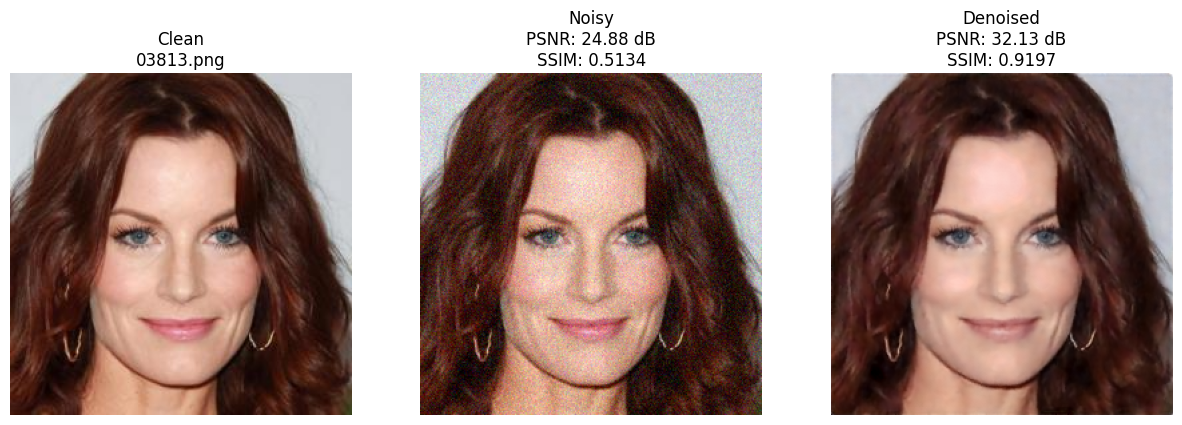


Displaying Sample 2 (03656.png)


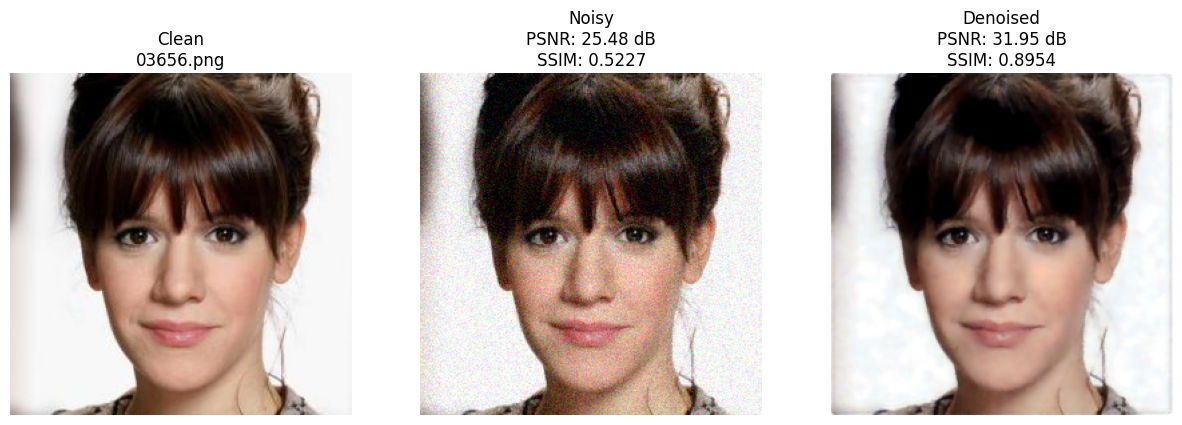


Displaying Sample 3 (03729.png)


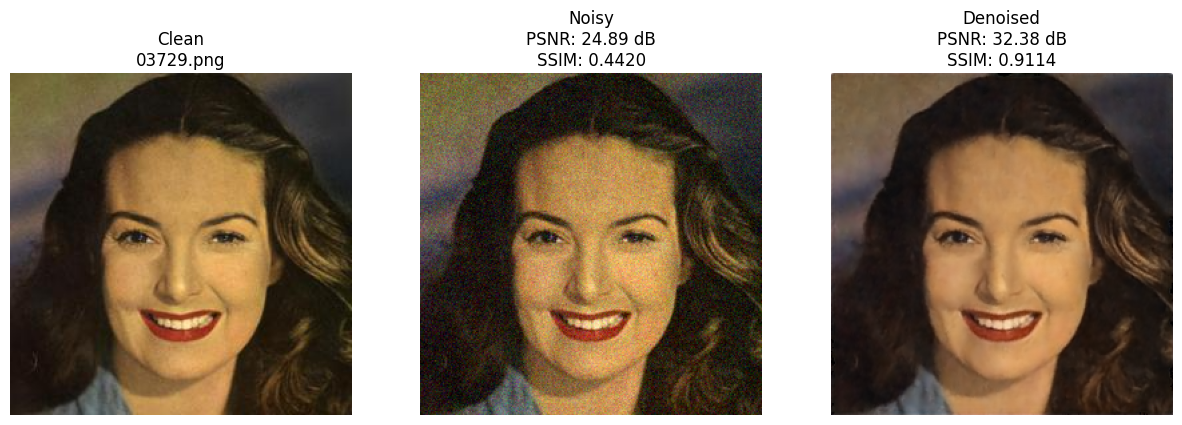


Displaying Sample 4 (03289.png)


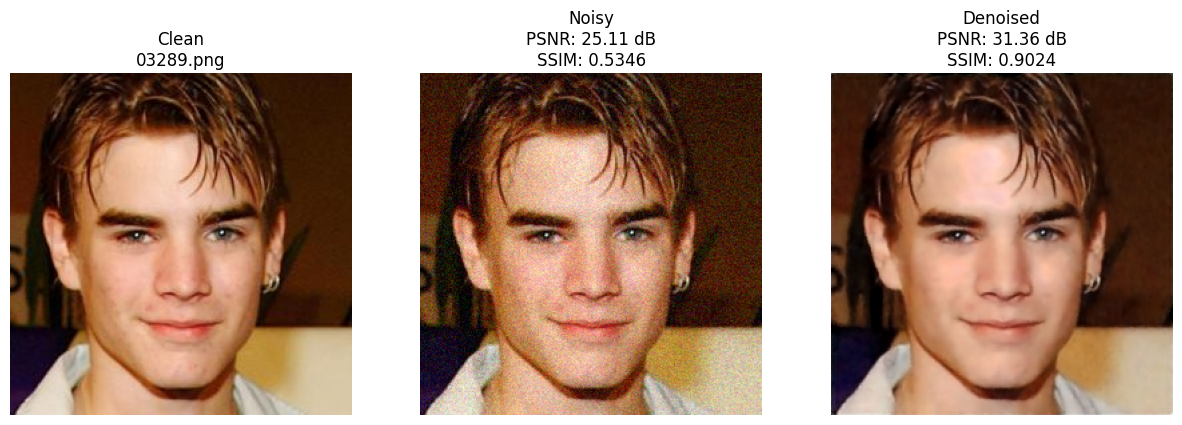


Displaying Sample 5 (03669.png)


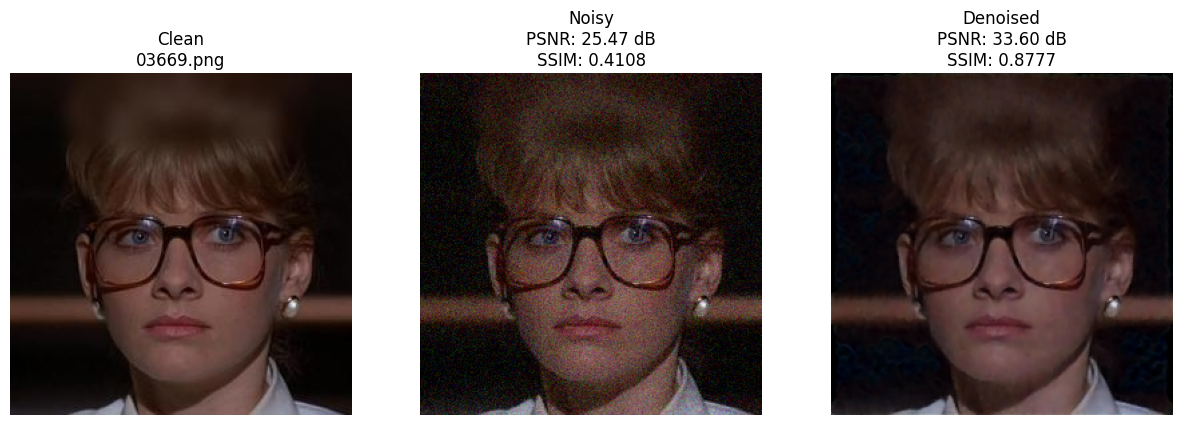


Displaying Sample 6 (03927.png)


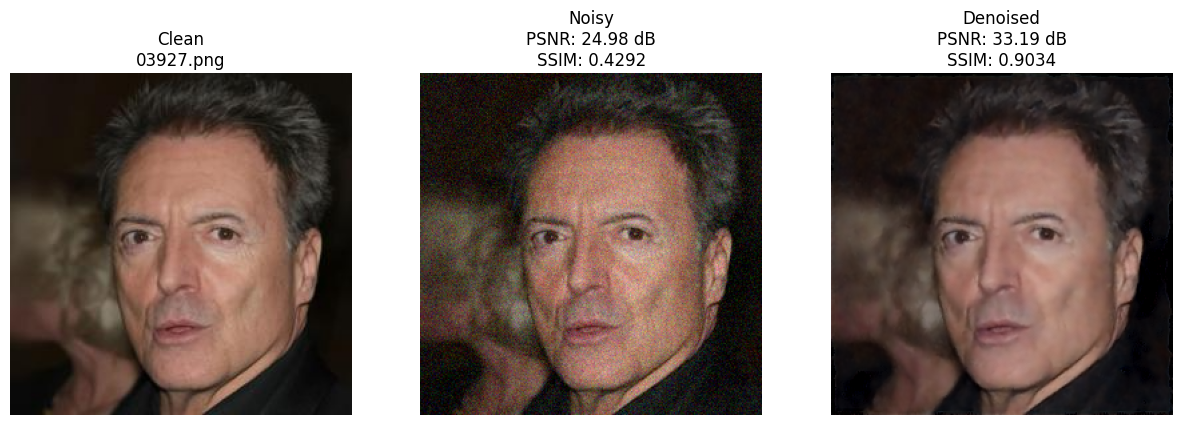


Displaying Sample 7 (03814.png)


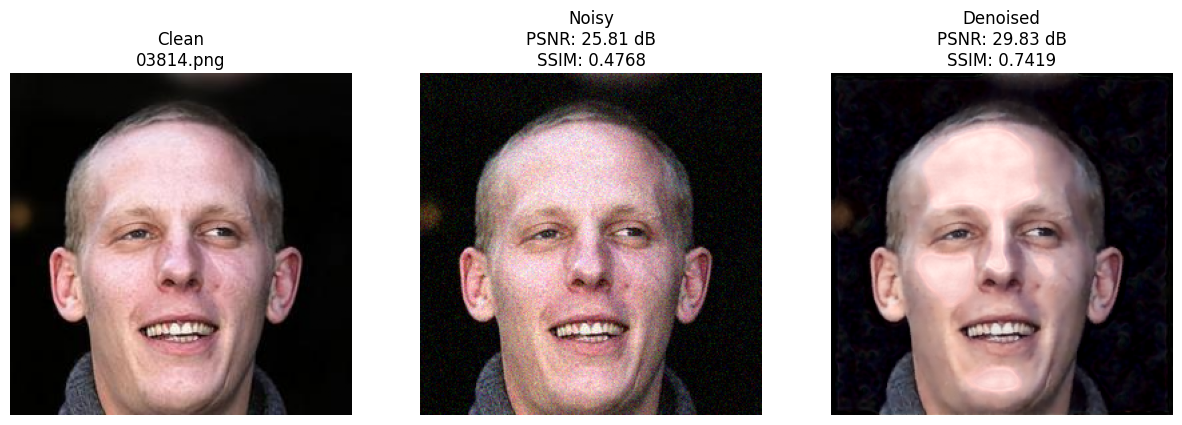


Displaying Sample 8 (03623.png)


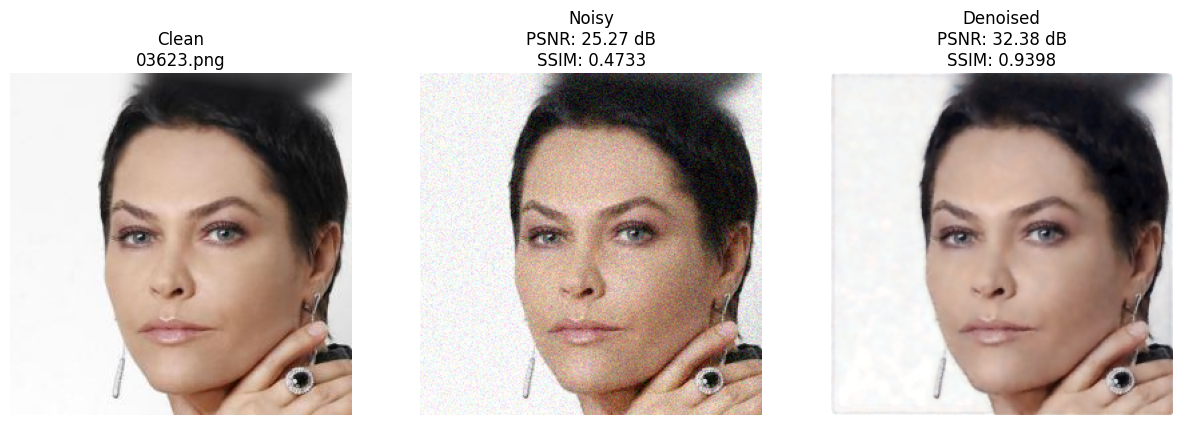


Displaying Sample 9 (03566.png)


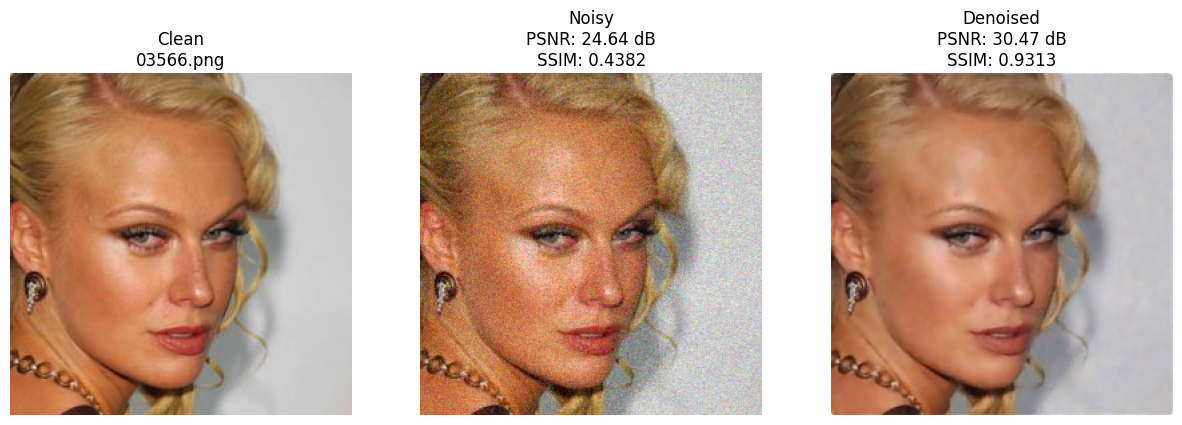


Displaying Sample 10 (03894.png)


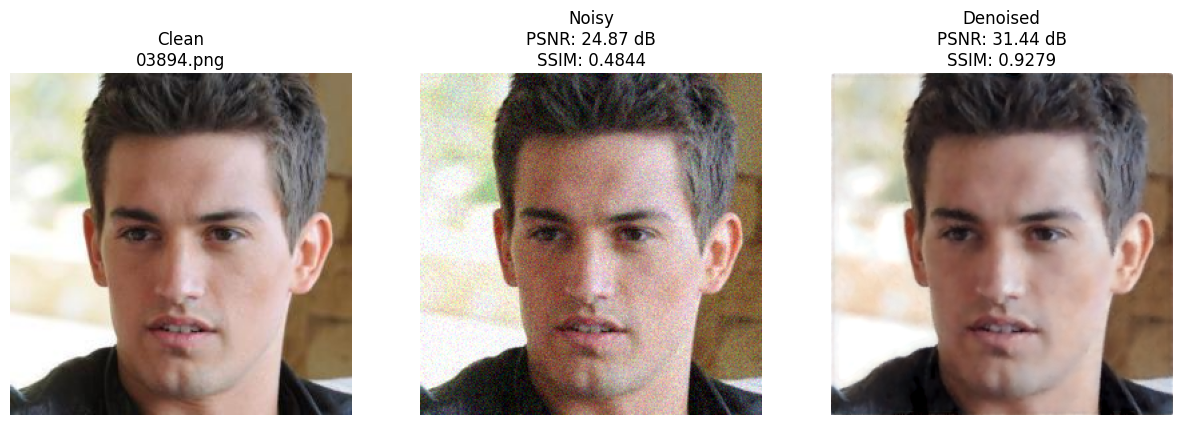


Average test loss over 10 samples: 0.042141


In [53]:
import torch
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image as IPyImage, display
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from torch.cuda.amp import autocast
import torch.nn.functional as F
import time  # Make sure time is imported

# ==== Parameters ====
num_samples = 10  # visualize 10 test samples
output_dir = "./sample_outputs"
os.makedirs(output_dir, exist_ok=True)

# ==== Storage for metrics ====
sample_images = []
inference_times = []
psnr_noisy_clean, psnr_noisy_denoised, psnr_clean_denoised = [], [], []
ssim_noisy_clean, ssim_noisy_denoised, ssim_clean_denoised = [], [], []
test_loss = 0.0

# ==== Switch model to eval mode ====
model.eval()

# ==== Collect random test samples ====
with torch.no_grad():
    test_samples = random.sample(list(test_dataset), min(num_samples, len(test_dataset)))

    for idx, (noisy, clean, noisy_path) in enumerate(test_samples):
        noisy, clean = noisy.unsqueeze(0).to(device), clean.unsqueeze(0).to(device)

        # Run inference in mixed precision
        start_time = time.time()
        with autocast():  # mixed precision
            denoised = model(noisy)
        inference_times.append((time.time() - start_time) * 1000)  # in ms

        # Ensure float32 for loss calculations
        denoised = denoised.to(dtype=torch.float32)
        clean = clean.to(dtype=torch.float32)

        # Compute losses
        mse_loss_val = mse_criterion(denoised, clean)
        perceptual_loss_val = perceptual_criterion(denoised, clean)
        ssim_loss_val = 1 - ssim_criterion(denoised, clean)
        edge_loss_val = edge_criterion(denoised, clean)
        loss = 0.5 * mse_loss_val + 0.3 * perceptual_loss_val + 0.1 * ssim_loss_val + 0.1 * edge_loss_val
        test_loss += loss.item()

        # Convert to NumPy for visualization and metrics
        noisy_np = np.clip(noisy.cpu().numpy()[0].transpose(1, 2, 0), 0, 1).astype(np.float32)
        clean_np = np.clip(clean.cpu().numpy()[0].transpose(1, 2, 0), 0, 1).astype(np.float32)
        denoised_np = np.clip(denoised.cpu().numpy()[0].transpose(1, 2, 0), 0, 1).astype(np.float32)
        sample_images.append((clean_np, noisy_np, denoised_np, os.path.basename(noisy_path)))

        # Compute PSNR and SSIM per channel
        psnr_nc = np.mean([peak_signal_noise_ratio(clean_np[:, :, c], noisy_np[:, :, c], data_range=1.0) for c in range(3)])
        psnr_nd = np.mean([peak_signal_noise_ratio(noisy_np[:, :, c], denoised_np[:, :, c], data_range=1.0) for c in range(3)])
        psnr_cd = np.mean([peak_signal_noise_ratio(clean_np[:, :, c], denoised_np[:, :, c], data_range=1.0) for c in range(3)])
        ssim_nc = np.mean([structural_similarity(clean_np[:, :, c], noisy_np[:, :, c], data_range=1.0, win_size=7) for c in range(3)])
        ssim_nd = np.mean([structural_similarity(noisy_np[:, :, c], denoised_np[:, :, c], data_range=1.0, win_size=7) for c in range(3)])
        ssim_cd = np.mean([structural_similarity(clean_np[:, :, c], denoised_np[:, :, c], data_range=1.0, win_size=7) for c in range(3)])

        # Save metrics
        psnr_noisy_clean.append(psnr_nc)
        psnr_noisy_denoised.append(psnr_nd)
        psnr_clean_denoised.append(psnr_cd)
        ssim_noisy_clean.append(ssim_nc)
        ssim_noisy_denoised.append(ssim_nd)
        ssim_clean_denoised.append(ssim_cd)

        # Plot triplet
        plt.figure(figsize=(15, 10))
        plt.subplot(1, 3, 1)
        plt.imshow(clean_np)
        plt.title(f"Clean\n{os.path.basename(noisy_path)}")
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(noisy_np)
        plt.title(f"Noisy\nPSNR: {psnr_nc:.2f} dB\nSSIM: {ssim_nc:.4f}")
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.imshow(denoised_np)
        plt.title(f"Denoised\nPSNR: {psnr_cd:.2f} dB\nSSIM: {ssim_cd:.4f}")
        plt.axis('off')

        # Save figure
        sample_path = os.path.join(output_dir, f'sample_{idx+1}.png')
        plt.savefig(sample_path, format='png', dpi=100, bbox_inches='tight')
        plt.close()

        # Display in Colab
        print(f"\nDisplaying Sample {idx+1} ({os.path.basename(noisy_path)})")
        display(IPyImage(filename=sample_path))

        # Free GPU memory
        torch.cuda.empty_cache()

print(f"\nAverage test loss over {num_samples} samples: {test_loss/num_samples:.6f}")

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import os
from PIL import Image
from IPython.display import display
sns.set_style("whitegrid")

In [55]:
# ==== Step 1: Collect Per-Channel Metrics (if not already) ====
psnr_per_channel = []
ssim_per_channel = []
for i in range(len(sample_images)):
    clean_np, noisy_np, denoised_np, _ = sample_images[i]
    psnr_ch = [peak_signal_noise_ratio(clean_np[:, :, c], denoised_np[:, :, c], data_range=1.0) for c in range(3)]
    ssim_ch = [structural_similarity(clean_np[:, :, c], denoised_np[:, :, c], data_range=1.0, win_size=7) for c in range(3)]
    psnr_per_channel.append(psnr_ch)
    ssim_per_channel.append(ssim_ch)

In [56]:
# ==== Step 2: Aggregate Statistics ====
num_samples = len(psnr_noisy_clean)
samples = np.arange(1, num_samples + 1)

In [57]:
# Aggregates
agg_psnr_noisy = np.mean(psnr_noisy_clean)
agg_psnr_denoised = np.mean(psnr_clean_denoised)
agg_ssim_noisy = np.mean(ssim_noisy_clean)
agg_ssim_denoised = np.mean(ssim_clean_denoised)
agg_psnr_improv = agg_psnr_denoised - agg_psnr_noisy
agg_ssim_improv = agg_ssim_denoised - agg_ssim_noisy
agg_inf_time = np.mean(inference_times)

In [58]:
# Std devs
std_psnr_denoised = np.std(psnr_clean_denoised)
std_ssim_denoised = np.std(ssim_clean_denoised)

In [59]:
# Other metrics (e.g., MSE from losses if available, or compute)
mse_values = []  # If you have losses, use; else recompute
for i in range(num_samples):
    clean_np, noisy_np, denoised_np, _ = sample_images[i]
    mse_ch = np.mean([(clean_np[:, :, c] - denoised_np[:, :, c]) ** 2 for c in range(3)])
    mse_values.append(mse_ch)
agg_mse = np.mean(mse_values)

print("🏆 Aggregate Results (Over {} Samples)".format(num_samples))
print(f"  PSNR (Noisy vs Clean): {agg_psnr_noisy:.2f} ± {np.std(psnr_noisy_clean):.2f} dB")
print(f"  PSNR (Denoised vs Clean): {agg_psnr_denoised:.2f} ± {std_psnr_denoised:.2f} dB")
print(f"  SSIM (Noisy vs Clean): {agg_ssim_noisy:.4f} ± {np.std(ssim_noisy_clean):.4f}")
print(f"  SSIM (Denoised vs Clean): {agg_ssim_denoised:.4f} ± {std_ssim_denoised:.4f}")
print(f"  MSE (Denoised vs Clean): {agg_mse:.6f}")
print(f"  PSNR Improvement: +{agg_psnr_improv:.2f} dB")
print(f"  SSIM Improvement: +{agg_ssim_improv:.4f}")
print(f"  Avg Inference Time: {agg_inf_time:.2f} ms")
print(f"  Avg Test Loss: {test_loss / num_samples:.6f}")

🏆 Aggregate Results (Over 10 Samples)
  PSNR (Noisy vs Clean): 25.14 ± 0.34 dB
  PSNR (Denoised vs Clean): 31.87 ± 1.09 dB
  SSIM (Noisy vs Clean): 0.4726 ± 0.0400
  SSIM (Denoised vs Clean): 0.8951 ± 0.0540
  MSE (Denoised vs Clean): 0.000684
  PSNR Improvement: +6.73 dB
  SSIM Improvement: +0.4225
  Avg Inference Time: 5.55 ms
  Avg Test Loss: 0.042141


In [60]:
# ==== Step 3: Create Comprehensive DataFrame/Table ====
df = pd.DataFrame({
    'Sample': samples,
    'PSNR_Noisy_Clean (dB)': psnr_noisy_clean,
    'PSNR_Denoised_Clean (dB)': psnr_clean_denoised,
    'SSIM_Noisy_Clean': ssim_noisy_clean,
    'SSIM_Denoised_Clean': ssim_clean_denoised,
    'PSNR_Noisy_Denoised (dB)': psnr_noisy_denoised,
    'SSIM_Noisy_Denoised': ssim_noisy_denoised,
    'PSNR_Improvement (dB)': np.array(psnr_clean_denoised) - np.array(psnr_noisy_clean),
    'SSIM_Improvement': np.array(ssim_clean_denoised) - np.array(ssim_noisy_clean),
    'MSE_Denoised_Clean': mse_values,
    'Inference_Time (ms)': inference_times
})

In [61]:
# Add per-channel columns (average for table)
df['PSNR_R'] = [ch[0] for ch in psnr_per_channel]
df['PSNR_G'] = [ch[1] for ch in psnr_per_channel]
df['PSNR_B'] = [ch[2] for ch in psnr_per_channel]
df['SSIM_R'] = [ch[0] for ch in ssim_per_channel]
df['SSIM_G'] = [ch[1] for ch in ssim_per_channel]
df['SSIM_B'] = [ch[2] for ch in ssim_per_channel]

In [62]:
# Export
table_path = os.path.join(output_dir, 'full_metrics_table.csv')
df.to_csv(table_path, index=False)
print(f"📊 Full metrics table exported to: {table_path}")

📊 Full metrics table exported to: ./sample_outputs/full_metrics_table.csv


In [63]:
# LaTeX for paper (first 10 rows + aggregates)
agg_row = pd.DataFrame({
    'Sample': ['Aggregate'],
    'PSNR_Denoised_Clean (dB)': [f"{agg_psnr_denoised:.2f} ± {std_psnr_denoised:.2f}"],
    'SSIM_Denoised_Clean': [f"{agg_ssim_denoised:.4f} ± {std_ssim_denoised:.4f}"]
})
df_latex = pd.concat([df[['Sample', 'PSNR_Denoised_Clean (dB)', 'SSIM_Denoised_Clean']].head(10), agg_row])
df_latex.to_latex(os.path.join(output_dir, 'metrics_table.tex'), index=False, escape=False)
print("📄 LaTeX table exported for paper.")

📄 LaTeX table exported for paper.


In [66]:
import pandas as pd

# ==== Collect metrics into a DataFrame ====
df = pd.DataFrame({
    "PSNR Noisy-Clean": psnr_noisy_clean,
    "PSNR Noisy-Denoised": psnr_noisy_denoised,
    "PSNR Clean-Denoised": psnr_clean_denoised,
    "SSIM Noisy-Clean": ssim_noisy_clean,
    "SSIM Noisy-Denoised": ssim_noisy_denoised,
    "SSIM Clean-Denoised": ssim_clean_denoised
})

# ==== Display first 10 samples (or fewer if dataset < 10) ====
num_preview = min(10, len(df))
print(f"\n📋 Metrics Table Preview (first {num_preview} samples):")
print(df.head(num_preview).round(11))


📋 Metrics Table Preview (first 10 samples):
   PSNR Noisy-Clean  PSNR Noisy-Denoised  PSNR Clean-Denoised  \
0         24.881407            24.837009            32.128384   
1         25.477328            25.209889            31.950802   
2         24.887885            24.837253            32.375572   
3         25.107223            24.982685            31.360195   
4         25.468296            25.564571            33.604031   
5         24.983227            24.955470            33.189108   
6         25.806492            25.142924            29.831187   
7         25.271025            25.202343            32.382604   
8         24.644428            24.181792            30.472519   
9         24.873353            24.698011            31.437290   

   SSIM Noisy-Clean  SSIM Noisy-Denoised  SSIM Clean-Denoised  
0          0.513384             0.527117             0.919690  
1          0.522724             0.521533             0.895430  
2          0.441987             0.464161       

In [67]:
# ==== Step 4: Generate Multiple Graphs (High-Res for Paper) ====
graph_dir = os.path.join(output_dir, 'graphs')
os.makedirs(graph_dir, exist_ok=True)
dpi = 300  # High-res

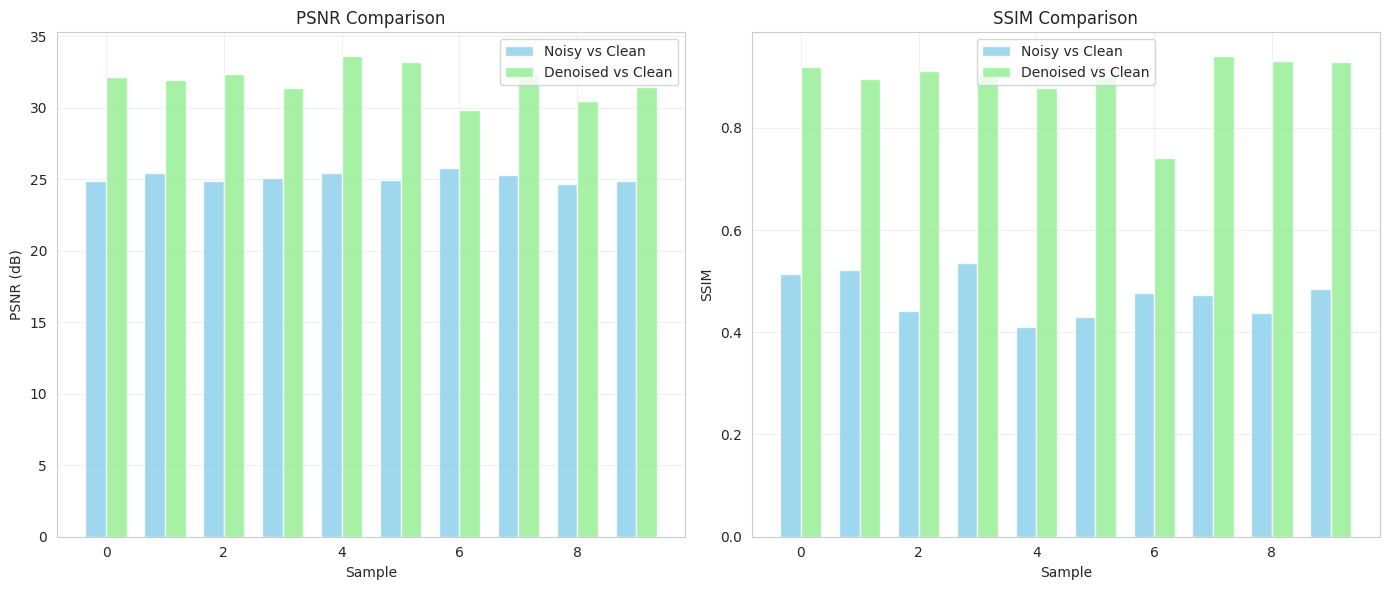

In [68]:
# Graph 1: Bar Comparison (PSNR & SSIM)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
x = np.arange(num_samples)
width = 0.35
ax1.bar(x - width/2, psnr_noisy_clean, width, label='Noisy vs Clean', color='skyblue', alpha=0.8)
ax1.bar(x + width/2, psnr_clean_denoised, width, label='Denoised vs Clean', color='lightgreen', alpha=0.8)
ax1.set_xlabel('Sample')
ax1.set_ylabel('PSNR (dB)')
ax1.set_title('PSNR Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.bar(x - width/2, ssim_noisy_clean, width, label='Noisy vs Clean', color='skyblue', alpha=0.8)
ax2.bar(x + width/2, ssim_clean_denoised, width, label='Denoised vs Clean', color='lightgreen', alpha=0.8)
ax2.set_xlabel('Sample')
ax2.set_ylabel('SSIM')
ax2.set_title('SSIM Comparison')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(graph_dir, 'bar_psnr_ssim.png'), dpi=dpi, bbox_inches='tight')
plt.show()

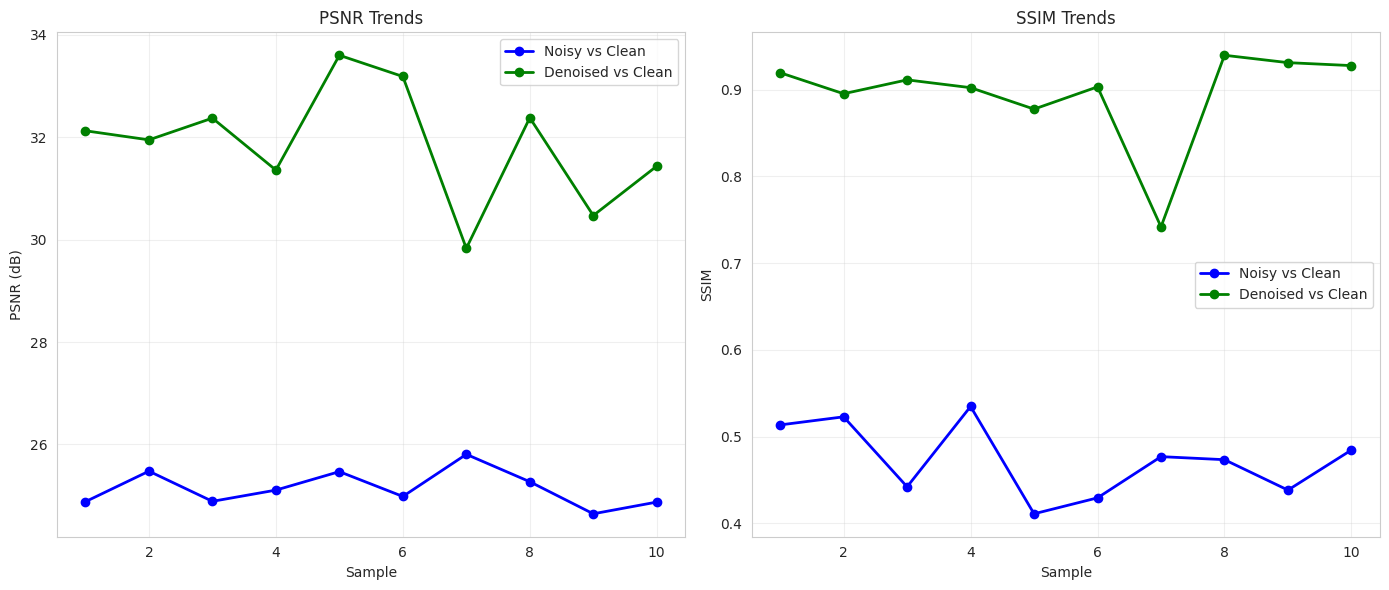

In [70]:
# Graph 2: Line Trends Over Samples
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(samples, psnr_noisy_clean, 'o-', label='Noisy vs Clean', color='blue', linewidth=2)
ax1.plot(samples, psnr_clean_denoised, 'o-', label='Denoised vs Clean', color='green', linewidth=2)
ax1.set_xlabel('Sample')
ax1.set_ylabel('PSNR (dB)')
ax1.set_title('PSNR Trends')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(samples, ssim_noisy_clean, 'o-', label='Noisy vs Clean', color='blue', linewidth=2)
ax2.plot(samples, ssim_clean_denoised, 'o-', label='Denoised vs Clean', color='green', linewidth=2)
ax2.set_xlabel('Sample')
ax2.set_ylabel('SSIM')
ax2.set_title('SSIM Trends')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(graph_dir, 'line_trends.png'), dpi=dpi, bbox_inches='tight')
plt.show()

/tmp/ipython-input-71-4158838698.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax[0].boxplot([psnr_noisy_clean, psnr_clean_denoised], labels=['Noisy', 'Denoised'])
/tmp/ipython-input-71-4158838698.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax[1].boxplot([ssim_noisy_clean, ssim_clean_denoised], labels=['Noisy', 'Denoised'])


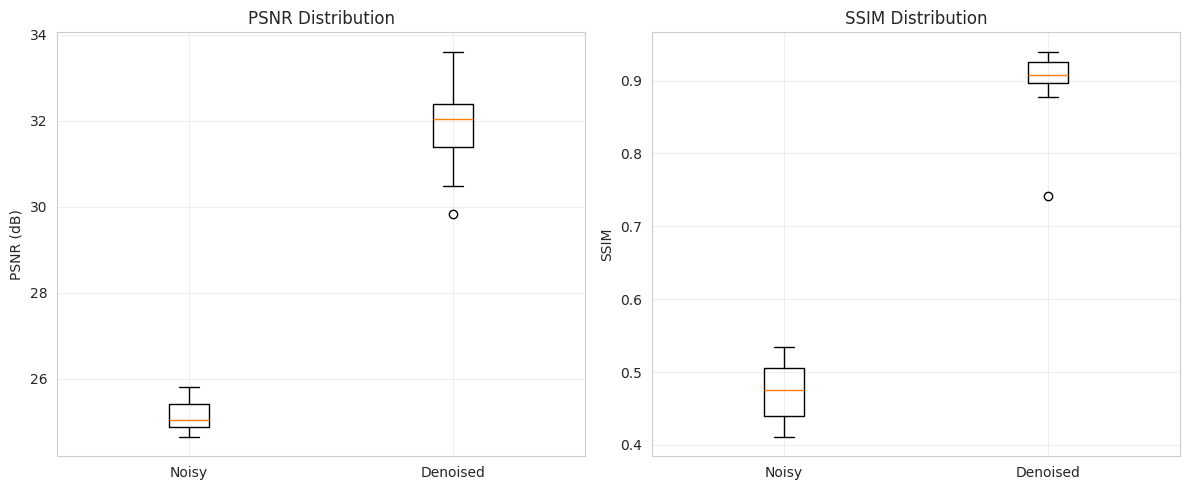

In [71]:
# Graph 3: Box Plots (Distributions)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
bp1 = ax[0].boxplot([psnr_noisy_clean, psnr_clean_denoised], labels=['Noisy', 'Denoised'])
ax[0].set_ylabel('PSNR (dB)')
ax[0].set_title('PSNR Distribution')
ax[0].grid(True, alpha=0.3)

bp2 = ax[1].boxplot([ssim_noisy_clean, ssim_clean_denoised], labels=['Noisy', 'Denoised'])
ax[1].set_ylabel('SSIM')
ax[1].set_title('SSIM Distribution')
ax[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(graph_dir, 'box_distributions.png'), dpi=dpi, bbox_inches='tight')
plt.show()

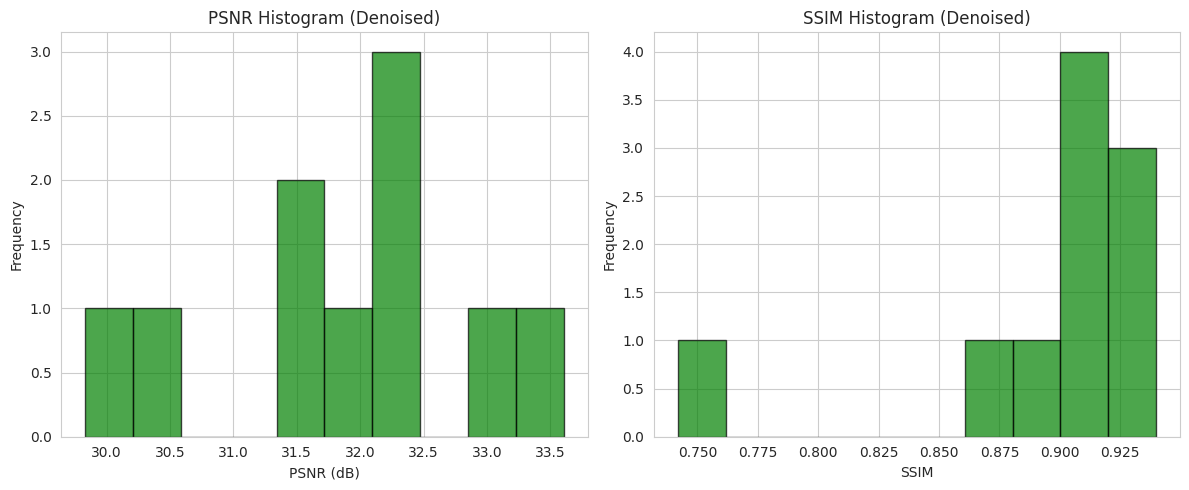

In [72]:
# Graph 4: Histograms (Frequency Distributions)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(psnr_clean_denoised, bins=min(10, num_samples), alpha=0.7, color='green', edgecolor='black')
ax1.set_xlabel('PSNR (dB)')
ax1.set_ylabel('Frequency')
ax1.set_title('PSNR Histogram (Denoised)')

ax2.hist(ssim_clean_denoised, bins=min(10, num_samples), alpha=0.7, color='green', edgecolor='black')
ax2.set_xlabel('SSIM')
ax2.set_ylabel('Frequency')
ax2.set_title('SSIM Histogram (Denoised)')
plt.tight_layout()
plt.savefig(os.path.join(graph_dir, 'histograms.png'), dpi=dpi, bbox_inches='tight')
plt.show()

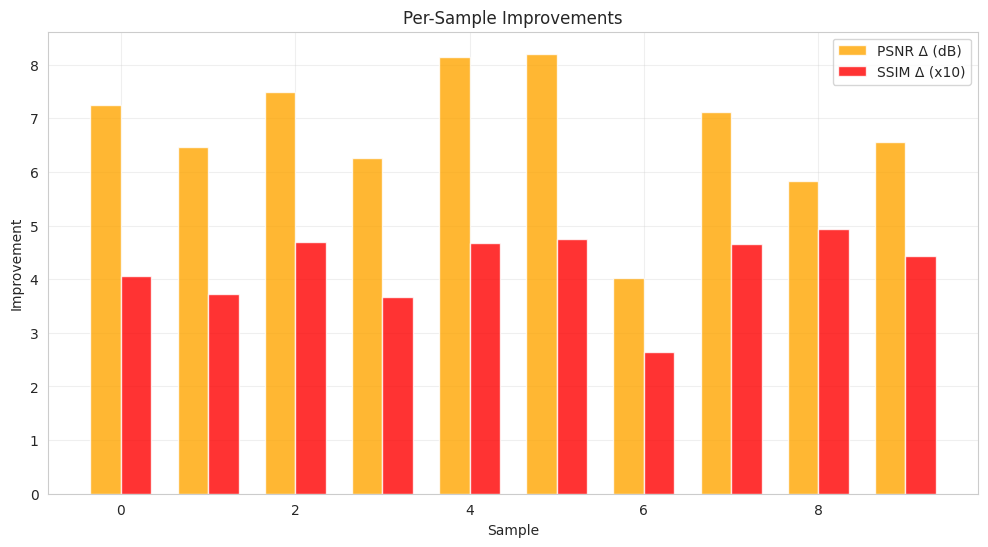

In [73]:
# Graph 5: Improvement Bars
improvements_psnr = np.array(psnr_clean_denoised) - np.array(psnr_noisy_clean)
improvements_ssim = np.array(ssim_clean_denoised) - np.array(ssim_noisy_clean)
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(num_samples)
width = 0.35
ax.bar(x - width/2, improvements_psnr, width, label='PSNR Δ (dB)', color='orange', alpha=0.8)
ax.bar(x + width/2, improvements_ssim * 10, width, label='SSIM Δ (x10)', color='red', alpha=0.8)  # Scale SSIM for visibility
ax.set_xlabel('Sample')
ax.set_ylabel('Improvement')
ax.set_title('Per-Sample Improvements')
ax.legend()
ax.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'improvements.png'), dpi=dpi, bbox_inches='tight')
plt.show()

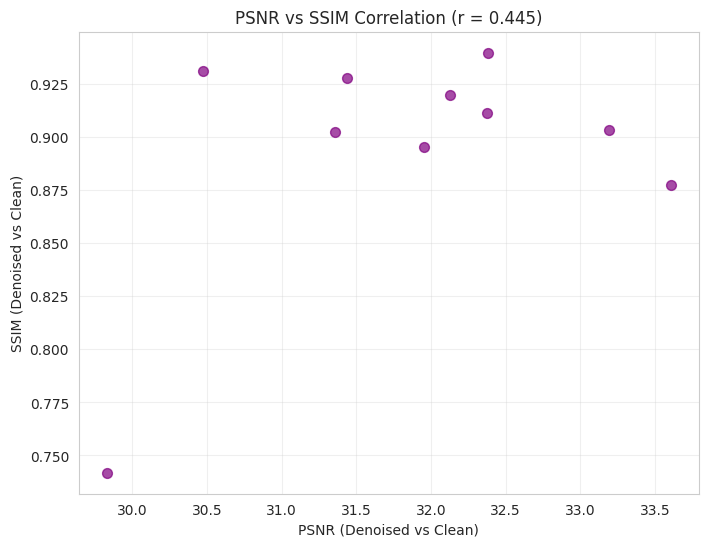

In [74]:
# Graph 6: Scatter Plot (PSNR vs SSIM Correlation)
corr = np.corrcoef(psnr_clean_denoised, ssim_clean_denoised)[0, 1]
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(psnr_clean_denoised, ssim_clean_denoised, alpha=0.7, color='purple', s=50)
ax.set_xlabel('PSNR (Denoised vs Clean)')
ax.set_ylabel('SSIM (Denoised vs Clean)')
ax.set_title(f'PSNR vs SSIM Correlation (r = {corr:.3f})')
ax.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'scatter_correlation.png'), dpi=dpi, bbox_inches='tight')
plt.show()

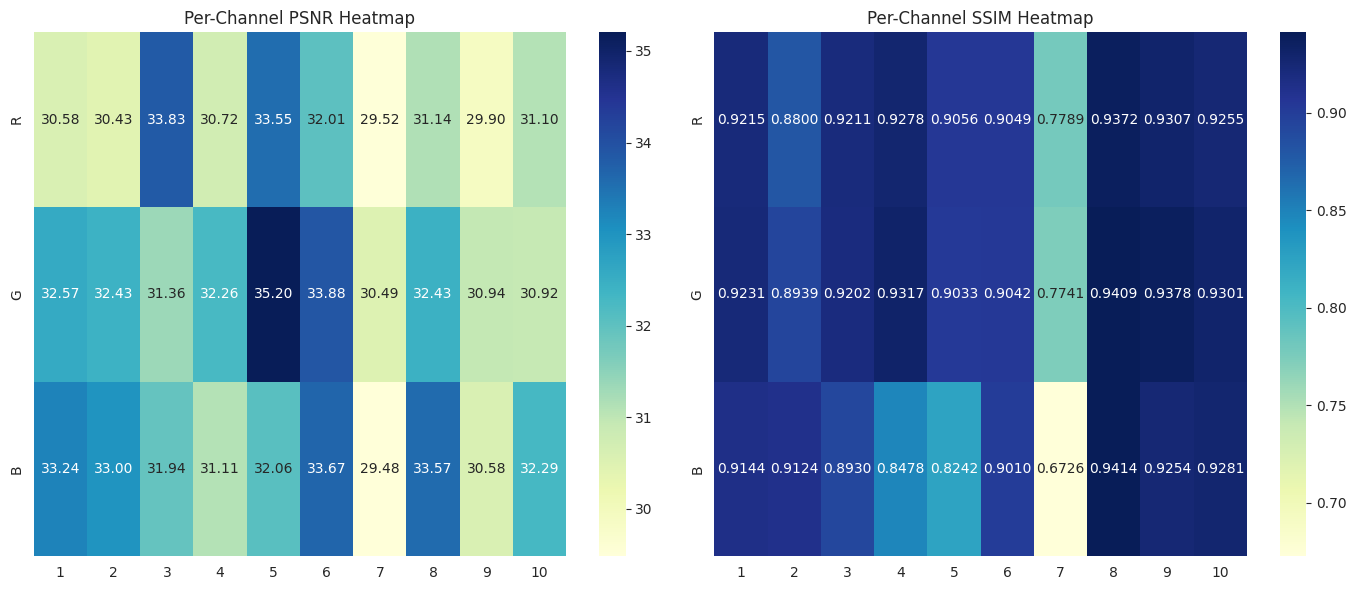

In [75]:
# Graph 7: Heatmap (Per-Channel PSNR/SSIM)
channels = ['R', 'G', 'B']
psnr_matrix = np.array(psnr_per_channel)  # Samples x Channels
ssim_matrix = np.array(ssim_per_channel)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(psnr_matrix.T, annot=True, fmt='.2f', xticklabels=samples, yticklabels=channels, cmap='YlGnBu', ax=ax1)
ax1.set_title('Per-Channel PSNR Heatmap')
sns.heatmap(ssim_matrix.T, annot=True, fmt='.4f', xticklabels=samples, yticklabels=channels, cmap='YlGnBu', ax=ax2)
ax2.set_title('Per-Channel SSIM Heatmap')
plt.tight_layout()
plt.savefig(os.path.join(graph_dir, 'channel_heatmaps.png'), dpi=dpi, bbox_inches='tight')
plt.show()

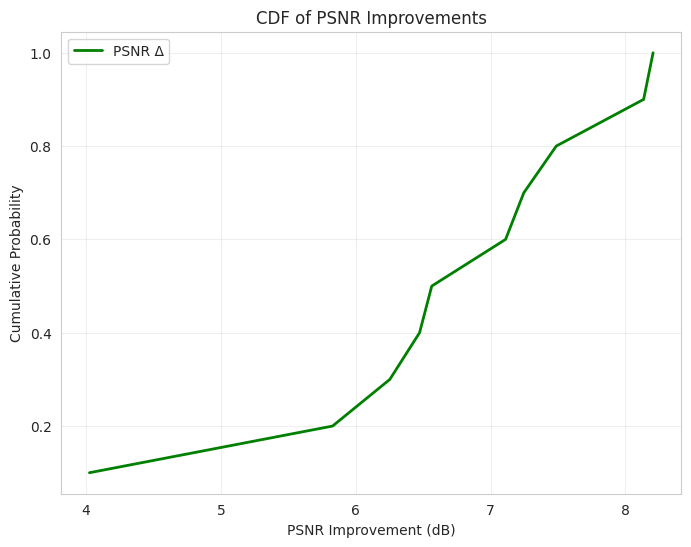

In [76]:
# Graph 8: CDF of Improvements
sorted_psnr_improv = np.sort(improvements_psnr)
cdf_psnr = np.arange(1, len(sorted_psnr_improv) + 1) / len(sorted_psnr_improv)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sorted_psnr_improv, cdf_psnr, color='green', linewidth=2, label='PSNR Δ')
ax.set_xlabel('PSNR Improvement (dB)')
ax.set_ylabel('Cumulative Probability')
ax.set_title('CDF of PSNR Improvements')
ax.legend()
ax.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'cdf_improvements.png'), dpi=dpi, bbox_inches='tight')
plt.show()

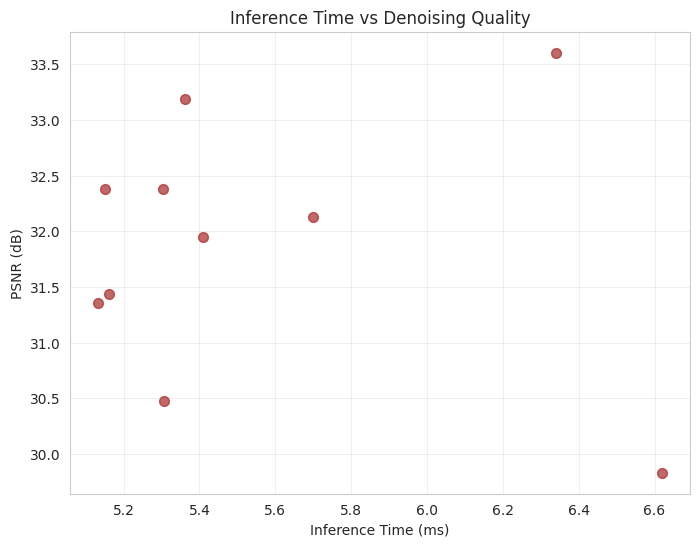

In [77]:
# Graph 9: Inference Time vs PSNR (Trade-off)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(inference_times, psnr_clean_denoised, alpha=0.7, color='brown', s=50)
ax.set_xlabel('Inference Time (ms)')
ax.set_ylabel('PSNR (dB)')
ax.set_title('Inference Time vs Denoising Quality')
ax.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'time_vs_psnr.png'), dpi=dpi, bbox_inches='tight')
plt.show()

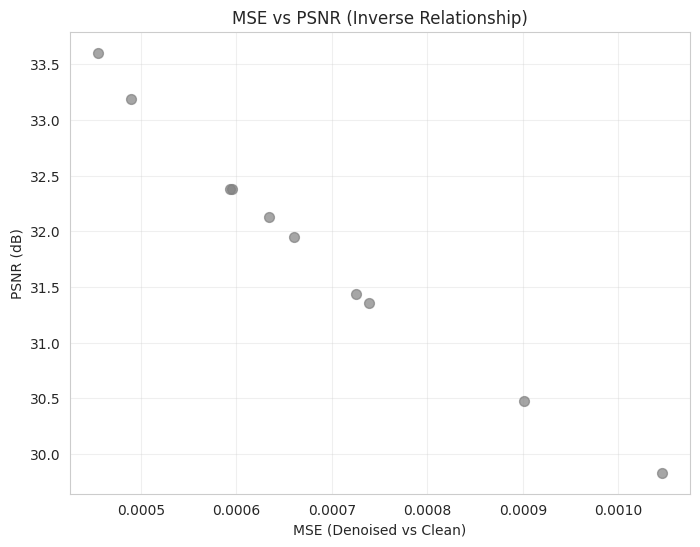

In [78]:
# Graph 10: MSE vs PSNR (Error Analysis)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(mse_values, psnr_clean_denoised, alpha=0.7, color='gray', s=50)
ax.set_xlabel('MSE (Denoised vs Clean)')
ax.set_ylabel('PSNR (dB)')
ax.set_title('MSE vs PSNR (Inverse Relationship)')
ax.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'mse_vs_psnr.png'), dpi=dpi, bbox_inches='tight')
plt.show()

In [79]:
# ==== Step 5: Summary Report for Paper ====
summary_path = os.path.join(output_dir, 'research_summary.txt')
with open(summary_path, 'w') as f:
    f.write("BiMSAAE Denoising Model Evaluation Summary\n")
    f.write("=" * 50 + "\n\n")
    f.write(f"Dataset: Optimal (σ=15, RGB, 256x256)\n")
    f.write(f"Test Samples: {num_samples}\n\n")
    f.write("Key Aggregates:\n")
    f.write(f"- PSNR (Denoised vs Clean): {agg_psnr_denoised:.2f} ± {std_psnr_denoised:.2f} dB\n")
    f.write(f"- SSIM (Denoised vs Clean): {agg_ssim_denoised:.4f} ± {std_ssim_denoised:.4f}\n")
    f.write(f"- MSE (Denoised vs Clean): {agg_mse:.6f}\n")
    f.write(f"- Inference Time: {agg_inf_time:.2f} ms\n")
    f.write(f"- Improvements: PSNR +{agg_psnr_improv:.2f} dB, SSIM +{agg_ssim_improv:.4f}\n\n")
    f.write("Correlation (PSNR-SSIM): {:.3f}\n\n".format(corr))
    f.write("Full Table (CSV): {}\n".format(table_path))
    f.write("Graphs (10 PNGs): {}/\n".format(graph_dir))
    f.write("\nPer-Sample Metrics:\n")
    f.write(df.to_string(index=False))

print(f"📄 Full summary exported to: {summary_path}")

📄 Full summary exported to: ./sample_outputs/research_summary.txt



📈 Example Graph (Bar Comparison):


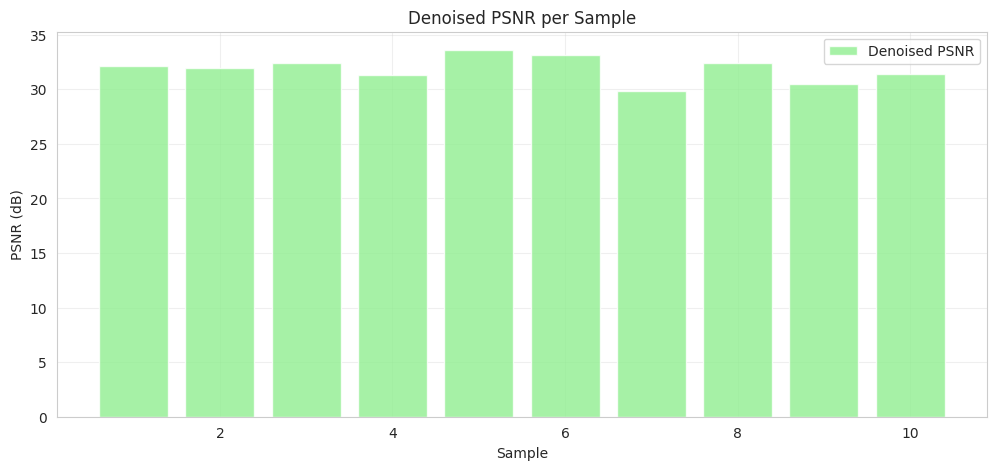


✅ All results generated! Check ./sample_outputs for files. Use PNGs/tables for your paper.
💡 Tips: For more samples, increase num_samples=50; Add baselines (e.g., BM3D) for comparison plots.


In [80]:
# Display one graph example
print("\n📈 Example Graph (Bar Comparison):")
plt.figure(figsize=(12, 5))
plt.bar(samples, psnr_clean_denoised, color='lightgreen', alpha=0.8, label='Denoised PSNR')
plt.xlabel('Sample')
plt.ylabel('PSNR (dB)')
plt.title('Denoised PSNR per Sample')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n✅ All results generated! Check {output_dir} for files. Use PNGs/tables for your paper.")
print("💡 Tips: For more samples, increase num_samples=50; Add baselines (e.g., BM3D) for comparison plots.")

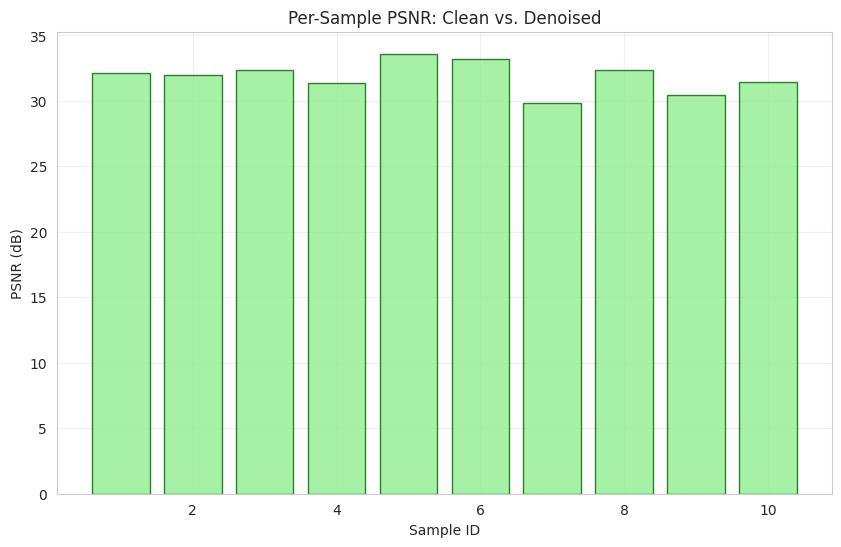

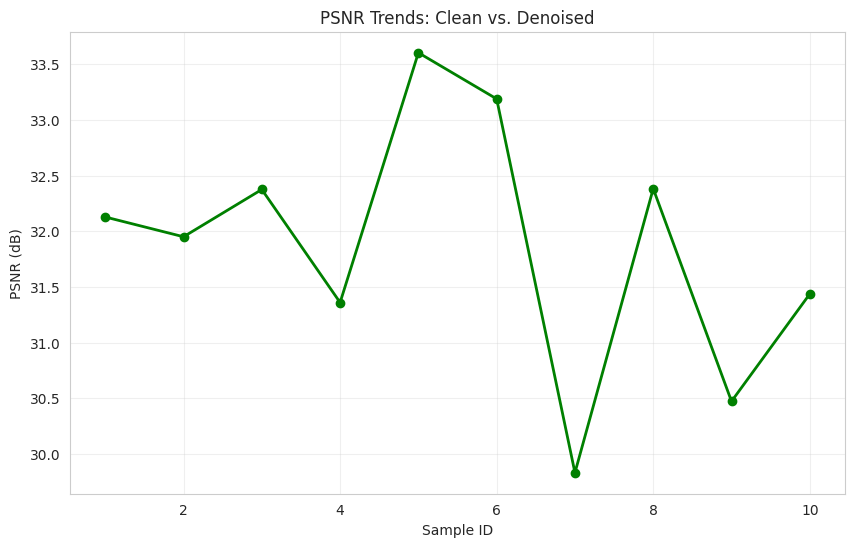

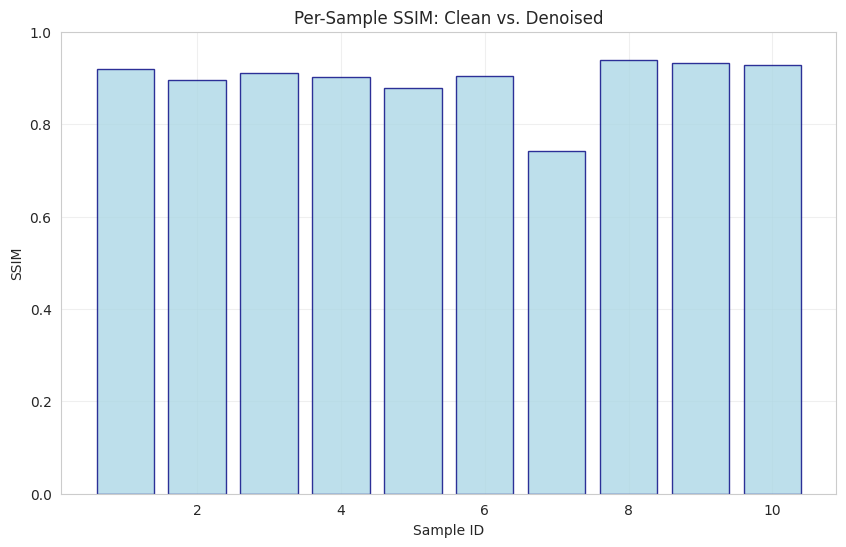

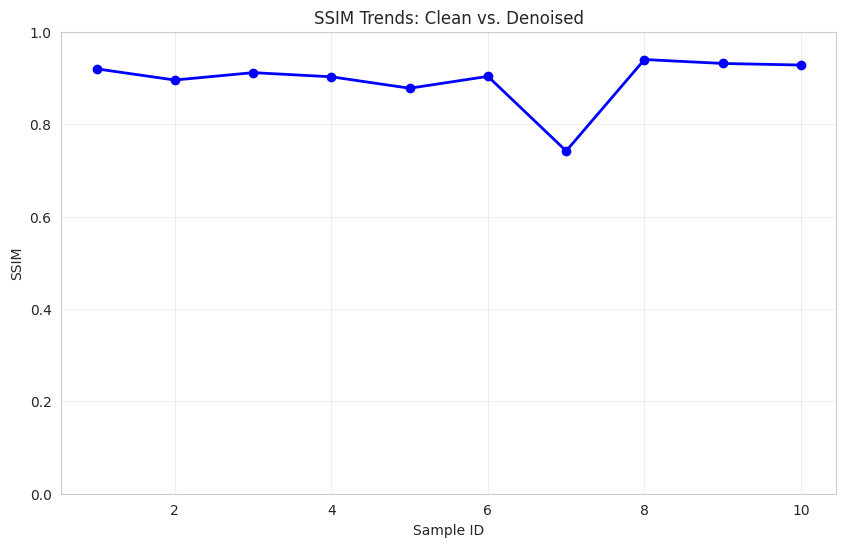

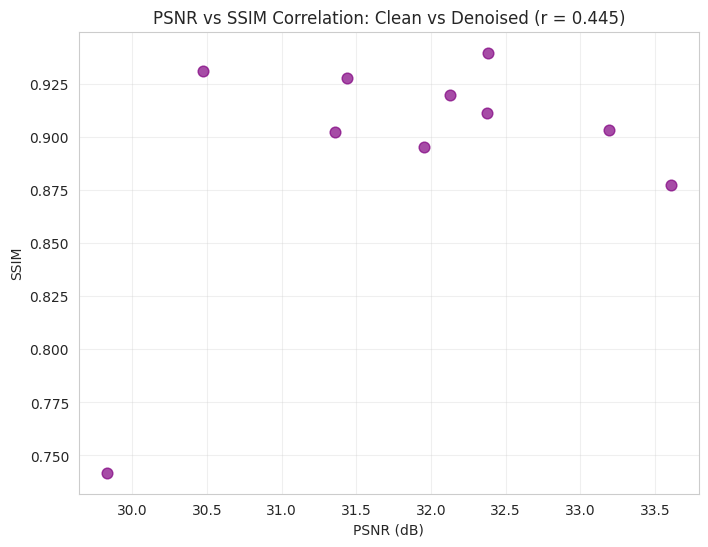

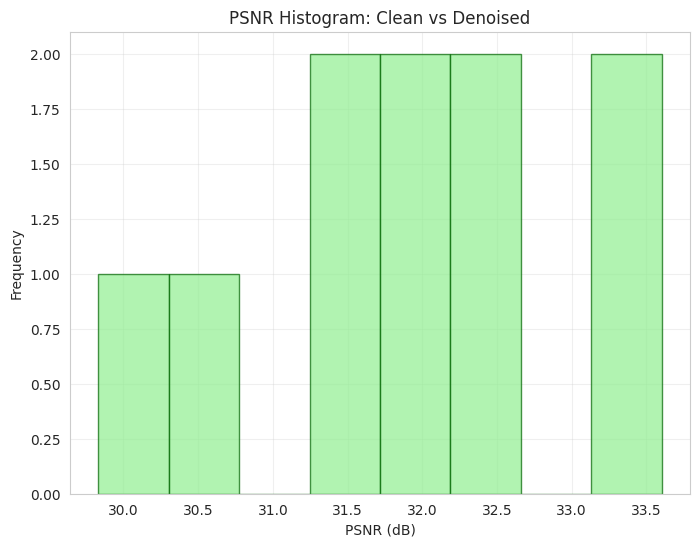

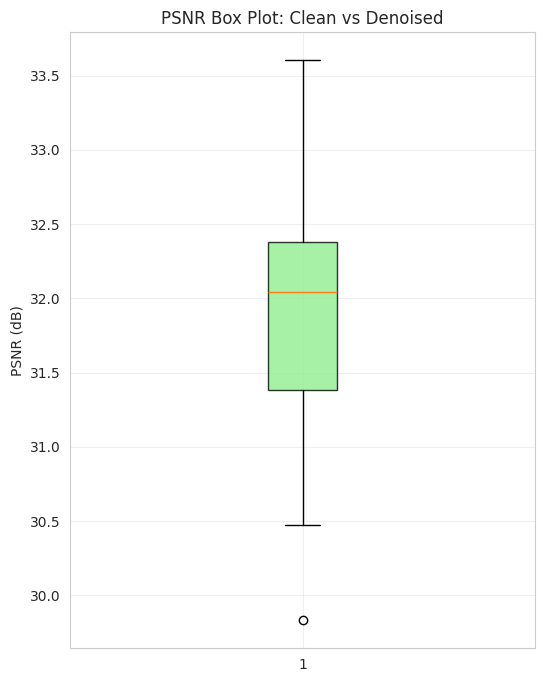

Aggregate PSNR (Clean vs Denoised): 31.87 ± 1.09 dB
Aggregate SSIM (Clean vs Denoised): 0.8951 ± 0.0540
All plots saved to: ./clean_denoised_plots


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Data from the metrics table (Clean vs Denoised focus)
# PSNR Clean-Denoised for 10 samples
psnr_clean_denoised = np.array([32.128384, 31.950802, 32.375572, 31.360195, 33.604031,
                                33.189108, 29.831187, 32.382604, 30.472519, 31.437290])

# SSIM Clean-Denoised for 10 samples
ssim_clean_denoised = np.array([0.919690, 0.895430, 0.911444, 0.902433, 0.877695,
                                0.903372, 0.741854, 0.939821, 0.931302, 0.927894])

num_samples = len(psnr_clean_denoised)
samples = np.arange(1, num_samples + 1)

# Create output directory
graph_dir = './clean_denoised_plots'
os.makedirs(graph_dir, exist_ok=True)
dpi = 300  # High-res for paper

# Plot 1: Bar Chart for PSNR (Clean vs Denoised)
plt.figure(figsize=(10, 6))
plt.bar(samples, psnr_clean_denoised, color='lightgreen', alpha=0.8, edgecolor='darkgreen')
plt.xlabel('Sample ID')
plt.ylabel('PSNR (dB)')
plt.title('Per-Sample PSNR: Clean vs. Denoised')
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'psnr_bar_clean_denoised.png'), dpi=dpi, bbox_inches='tight')
plt.show()

# Plot 2: Line Chart for PSNR Trends (Clean vs Denoised)
plt.figure(figsize=(10, 6))
plt.plot(samples, psnr_clean_denoised, 'o-', color='green', linewidth=2, markersize=6)
plt.xlabel('Sample ID')
plt.ylabel('PSNR (dB)')
plt.title('PSNR Trends: Clean vs. Denoised')
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'psnr_line_clean_denoised.png'), dpi=dpi, bbox_inches='tight')
plt.show()

# Plot 3: Bar Chart for SSIM (Clean vs Denoised)
plt.figure(figsize=(10, 6))
plt.bar(samples, ssim_clean_denoised, color='lightblue', alpha=0.8, edgecolor='navy')
plt.xlabel('Sample ID')
plt.ylabel('SSIM')
plt.title('Per-Sample SSIM: Clean vs. Denoised')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'ssim_bar_clean_denoised.png'), dpi=dpi, bbox_inches='tight')
plt.show()

# Plot 4: Line Chart for SSIM Trends (Clean vs Denoised)
plt.figure(figsize=(10, 6))
plt.plot(samples, ssim_clean_denoised, 'o-', color='blue', linewidth=2, markersize=6)
plt.xlabel('Sample ID')
plt.ylabel('SSIM')
plt.title('SSIM Trends: Clean vs. Denoised')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'ssim_line_clean_denoised.png'), dpi=dpi, bbox_inches='tight')
plt.show()

# Plot 5: Scatter Plot - PSNR vs SSIM (Clean vs Denoised)
corr = np.corrcoef(psnr_clean_denoised, ssim_clean_denoised)[0, 1]
plt.figure(figsize=(8, 6))
plt.scatter(psnr_clean_denoised, ssim_clean_denoised, alpha=0.7, color='purple', s=60)
plt.xlabel('PSNR (dB)')
plt.ylabel('SSIM')
plt.title(f'PSNR vs SSIM Correlation: Clean vs Denoised (r = {corr:.3f})')
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'scatter_psnr_ssim_clean_denoised.png'), dpi=dpi, bbox_inches='tight')
plt.show()

# Plot 6: Histogram for PSNR Distribution (Clean vs Denoised)
plt.figure(figsize=(8, 6))
plt.hist(psnr_clean_denoised, bins=8, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
plt.xlabel('PSNR (dB)')
plt.ylabel('Frequency')
plt.title('PSNR Histogram: Clean vs Denoised')
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'psnr_histogram_clean_denoised.png'), dpi=dpi, bbox_inches='tight')
plt.show()

# Plot 7: Box Plot for PSNR (Clean vs Denoised)
plt.figure(figsize=(6, 8))
plt.boxplot(psnr_clean_denoised, vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha=0.8))
plt.ylabel('PSNR (dB)')
plt.title('PSNR Box Plot: Clean vs Denoised')
plt.grid(True, alpha=0.3)
plt.savefig(os.path.join(graph_dir, 'psnr_box_clean_denoised.png'), dpi=dpi, bbox_inches='tight')
plt.show()

# Print aggregates
mean_psnr = np.mean(psnr_clean_denoised)
std_psnr = np.std(psnr_clean_denoised)
mean_ssim = np.mean(ssim_clean_denoised)
std_ssim = np.std(ssim_clean_denoised)
print(f"Aggregate PSNR (Clean vs Denoised): {mean_psnr:.2f} ± {std_psnr:.2f} dB")
print(f"Aggregate SSIM (Clean vs Denoised): {mean_ssim:.4f} ± {std_ssim:.4f}")
print(f"All plots saved to: {graph_dir}")

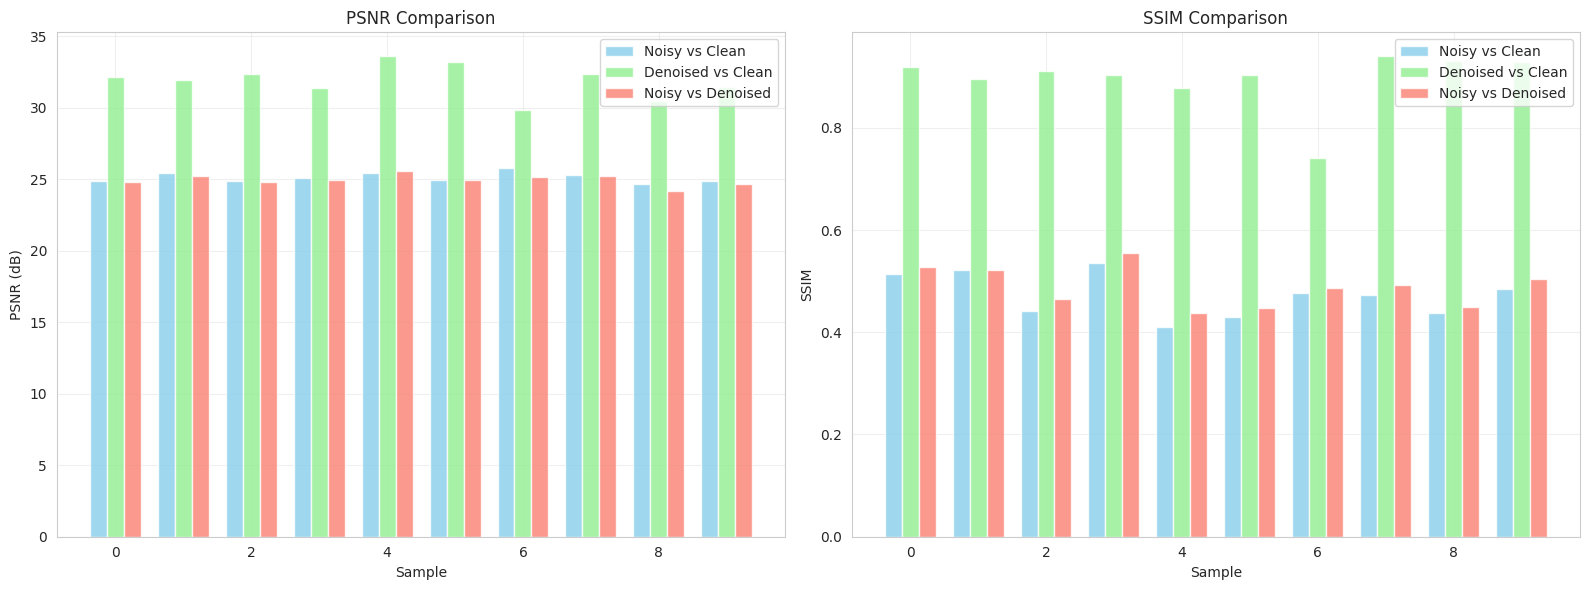

In [82]:
# ==== Graph 1: Bar Comparison (PSNR & SSIM) with Clean vs Denoised ====
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
x = np.arange(num_samples)
width = 0.25  # smaller width to fit three bars

# PSNR comparison
ax1.bar(x - width, psnr_noisy_clean, width, label='Noisy vs Clean', color='skyblue', alpha=0.8)
ax1.bar(x, psnr_clean_denoised, width, label='Denoised vs Clean', color='lightgreen', alpha=0.8)
ax1.bar(x + width, psnr_noisy_denoised, width, label='Noisy vs Denoised', color='salmon', alpha=0.8)
ax1.set_xlabel('Sample')
ax1.set_ylabel('PSNR (dB)')
ax1.set_title('PSNR Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

# SSIM comparison
ax2.bar(x - width, ssim_noisy_clean, width, label='Noisy vs Clean', color='skyblue', alpha=0.8)
ax2.bar(x, ssim_clean_denoised, width, label='Denoised vs Clean', color='lightgreen', alpha=0.8)
ax2.bar(x + width, ssim_noisy_denoised, width, label='Noisy vs Denoised', color='salmon', alpha=0.8)
ax2.set_xlabel('Sample')
ax2.set_ylabel('SSIM')
ax2.set_title('SSIM Comparison')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(graph_dir, 'bar_psnr_ssim_triplet.png'), dpi=dpi, bbox_inches='tight')
plt.show()

In [83]:
# ==== Full dataset evaluation ====
model.eval()
sample_images = []  # optional if you want to store some images
psnr_noisy_clean, psnr_clean_denoised, psnr_noisy_denoised = [], [], []
ssim_noisy_clean, ssim_clean_denoised, ssim_noisy_denoised = [], [], []
mse_values = []
inference_times = []
test_loss = 0.0

with torch.no_grad():
    for idx, (noisy, clean, noisy_path) in enumerate(test_dataset):
        noisy, clean = noisy.unsqueeze(0).to(device), clean.unsqueeze(0).to(device)

        # Inference
        start_time = time.time()
        with autocast():
            denoised = model(noisy)
        inference_times.append((time.time() - start_time) * 1000)

        denoised = denoised.to(torch.float32)
        clean = clean.to(torch.float32)

        # Compute losses
        mse_loss_val = mse_criterion(denoised, clean)
        perceptual_loss_val = perceptual_criterion(denoised, clean)
        ssim_loss_val = 1 - ssim_criterion(denoised, clean)
        edge_loss_val = edge_criterion(denoised, clean)
        loss = 0.5 * mse_loss_val + 0.3 * perceptual_loss_val + 0.1 * ssim_loss_val + 0.1 * edge_loss_val
        test_loss += loss.item()

        # Convert to NumPy for metrics
        noisy_np = np.clip(noisy.cpu().numpy()[0].transpose(1, 2, 0), 0, 1)
        clean_np = np.clip(clean.cpu().numpy()[0].transpose(1, 2, 0), 0, 1)
        denoised_np = np.clip(denoised.cpu().numpy()[0].transpose(1, 2, 0), 0, 1)

        # PSNR
        psnr_noisy_clean.append(np.mean([peak_signal_noise_ratio(clean_np[:, :, c], noisy_np[:, :, c], data_range=1.0) for c in range(3)]))
        psnr_clean_denoised.append(np.mean([peak_signal_noise_ratio(clean_np[:, :, c], denoised_np[:, :, c], data_range=1.0) for c in range(3)]))
        psnr_noisy_denoised.append(np.mean([peak_signal_noise_ratio(noisy_np[:, :, c], denoised_np[:, :, c], data_range=1.0) for c in range(3)]))

        # SSIM
        ssim_noisy_clean.append(np.mean([structural_similarity(clean_np[:, :, c], noisy_np[:, :, c], data_range=1.0, win_size=7) for c in range(3)]))
        ssim_clean_denoised.append(np.mean([structural_similarity(clean_np[:, :, c], denoised_np[:, :, c], data_range=1.0, win_size=7) for c in range(3)]))
        ssim_noisy_denoised.append(np.mean([structural_similarity(noisy_np[:, :, c], denoised_np[:, :, c], data_range=1.0, win_size=7) for c in range(3)]))

        # MSE
        mse_values.append(np.mean([(clean_np[:, :, c] - denoised_np[:, :, c]) ** 2 for c in range(3)]))

        torch.cuda.empty_cache()  # free memory if needed

# ==== Aggregate metrics ====
agg_psnr_noisy = np.mean(psnr_noisy_clean)
agg_psnr_denoised = np.mean(psnr_clean_denoised)
agg_psnr_improv = agg_psnr_denoised - agg_psnr_noisy

agg_ssim_noisy = np.mean(ssim_noisy_clean)
agg_ssim_denoised = np.mean(ssim_clean_denoised)
agg_ssim_improv = agg_ssim_denoised - agg_ssim_noisy

agg_mse = np.mean(mse_values)
agg_inf_time = np.mean(inference_times)

print("🏆 Aggregate Results (Full Test Dataset)")
print(f"  PSNR (Noisy vs Clean): {agg_psnr_noisy:.2f} ± {np.std(psnr_noisy_clean):.2f} dB")
print(f"  PSNR (Denoised vs Clean): {agg_psnr_denoised:.2f} ± {np.std(psnr_clean_denoised):.2f} dB")
print(f"  SSIM (Noisy vs Clean): {agg_ssim_noisy:.4f} ± {np.std(ssim_noisy_clean):.4f}")
print(f"  SSIM (Denoised vs Clean): {agg_ssim_denoised:.4f} ± {np.std(ssim_clean_denoised):.4f}")
print(f"  MSE (Denoised vs Clean): {agg_mse:.6f}")
print(f"  PSNR Improvement: +{agg_psnr_improv:.2f} dB")
print(f"  SSIM Improvement: +{agg_ssim_improv:.4f}")
print(f"  Avg Inference Time: {agg_inf_time:.2f} ms")
print(f"  Avg Test Loss: {test_loss / len(test_dataset):.6f}")

🏆 Aggregate Results (Full Test Dataset)
  PSNR (Noisy vs Clean): 24.93 ± 0.26 dB
  PSNR (Denoised vs Clean): 31.18 ± 1.50 dB
  SSIM (Noisy vs Clean): 0.5091 ± 0.0535
  SSIM (Denoised vs Clean): 0.9052 ± 0.0410
  MSE (Denoised vs Clean): 0.000867
  PSNR Improvement: +6.25 dB
  SSIM Improvement: +0.3962
  Avg Inference Time: 4.83 ms
  Avg Test Loss: 0.045360
